# 検定と信頼区間: 比率の比較

* 黒木玄
* 2022-06-14～2022-06-15

$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
$


このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#比率の比較に関するP値と信頼区間" data-toc-modified-id="比率の比較に関するP値と信頼区間-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>比率の比較に関するP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#比率の比較に関するP値と信頼区間を使って行いたいこと" data-toc-modified-id="比率の比較に関するP値と信頼区間を使って行いたいこと-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>比率の比較に関するP値と信頼区間を使って行いたいこと</a></span></li><li><span><a href="#2×2の分割表型データとその2つの二項分布モデル" data-toc-modified-id="2×2の分割表型データとその2つの二項分布モデル-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2×2の分割表型データとその2つの二項分布モデル</a></span></li><li><span><a href="#比率の違いを表す2つの指標:-オッズ比パラメータ-OR-とリスク比パラメータ-RR" data-toc-modified-id="比率の違いを表す2つの指標:-オッズ比パラメータ-OR-とリスク比パラメータ-RR-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>比率の違いを表す2つの指標: オッズ比パラメータ OR とリスク比パラメータ RR</a></span></li></ul></li><li><span><a href="#Wald版のオッズ比に関するP値と信頼区間" data-toc-modified-id="Wald版のオッズ比に関するP値と信頼区間-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Wald版のオッズ比に関するP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#Wald版のオッズ比に関するP値と信頼区間の定義" data-toc-modified-id="Wald版のオッズ比に関するP値と信頼区間の定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Wald版のオッズ比に関するP値と信頼区間の定義</a></span></li><li><span><a href="#Wald版のオッズ比に関するP値と信頼区間の計算例" data-toc-modified-id="Wald版のオッズ比に関するP値と信頼区間の計算例-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Wald版のオッズ比に関するP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによるWald版のオッズ比に関するP値と信頼区間の計算の仕方" data-toc-modified-id="WolframAlphaによるWald版のオッズ比に関するP値と信頼区間の計算の仕方-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>WolframAlphaによるWald版のオッズ比に関するP値と信頼区間の計算の仕方</a></span></li><li><span><a href="#Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(1)" data-toc-modified-id="Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(1)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(1)</a></span></li><li><span><a href="#Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(2)" data-toc-modified-id="Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(2)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(2)</a></span></li><li><span><a href="#Julia言語によるWald版のオッズ比に関するP値函数の視覚化" data-toc-modified-id="Julia言語によるWald版のオッズ比に関するP値函数の視覚化-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Julia言語によるWald版のオッズ比に関するP値函数の視覚化</a></span></li><li><span><a href="#R言語でのWald版のオッズ比に関するP値と信頼区間の計算の仕方" data-toc-modified-id="R言語でのWald版のオッズ比に関するP値と信頼区間の計算の仕方-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>R言語でのWald版のオッズ比に関するP値と信頼区間の計算の仕方</a></span></li></ul></li><li><span><a href="#確率変数の対数オッズ比の分散の近似値の導出" data-toc-modified-id="確率変数の対数オッズ比の分散の近似値の導出-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>確率変数の対数オッズ比の分散の近似値の導出</a></span></li><li><span><a href="#問題:-対数リスク比の場合の正規分布近似" data-toc-modified-id="問題:-対数リスク比の場合の正規分布近似-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>問題: 対数リスク比の場合の正規分布近似</a></span></li><li><span><a href="#問題:-Wald版のリスク比に関するP値と信頼区間の定義" data-toc-modified-id="問題:-Wald版のリスク比に関するP値と信頼区間の定義-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>問題: Wald版のリスク比に関するP値と信頼区間の定義</a></span></li><li><span><a href="#問題:-Wald版のリスク比に関するP値と信頼区間の計算例" data-toc-modified-id="問題:-Wald版のリスク比に関するP値と信頼区間の計算例-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>問題: Wald版のリスク比に関するP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#Julia言語によるWald版のリスク比に関するP値と信頼区間の計算の仕方" data-toc-modified-id="Julia言語によるWald版のリスク比に関するP値と信頼区間の計算の仕方-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Julia言語によるWald版のリスク比に関するP値と信頼区間の計算の仕方</a></span></li><li><span><a href="#Julia言語によるWald版のリスク比に関するP値函数の視覚化" data-toc-modified-id="Julia言語によるWald版のリスク比に関するP値函数の視覚化-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Julia言語によるWald版のリスク比に関するP値函数の視覚化</a></span></li><li><span><a href="#R言語によるWald版のリスク比に関する信頼区間の計算の仕方" data-toc-modified-id="R言語によるWald版のリスク比に関する信頼区間の計算の仕方-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>R言語によるWald版のリスク比に関する信頼区間の計算の仕方</a></span></li><li><span><a href="#Wald版のリスク比に関するP値と信頼区間の計算例の問題の解答例" data-toc-modified-id="Wald版のリスク比に関するP値と信頼区間の計算例の問題の解答例-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Wald版のリスク比に関するP値と信頼区間の計算例の問題の解答例</a></span></li></ul></li><li><span><a href="#問題:-比率の差の場合の正規分布近似" data-toc-modified-id="問題:-比率の差の場合の正規分布近似-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>問題: 比率の差の場合の正規分布近似</a></span></li><li><span><a href="#問題:-Wald版の比率の差に関するP値と信頼区間の定義" data-toc-modified-id="問題:-Wald版の比率の差に関するP値と信頼区間の定義-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>問題: Wald版の比率の差に関するP値と信頼区間の定義</a></span></li><li><span><a href="#問題:-Wald版の比率の差に関するP値と信頼区間の計算例" data-toc-modified-id="問題:-Wald版の比率の差に関するP値と信頼区間の計算例-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>問題: Wald版の比率の差に関するP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#Julia言語によるWald版の比率の差に関するP値と信頼区間の計算の仕方" data-toc-modified-id="Julia言語によるWald版の比率の差に関するP値と信頼区間の計算の仕方-2.9.1"><span class="toc-item-num">2.9.1&nbsp;&nbsp;</span>Julia言語によるWald版の比率の差に関するP値と信頼区間の計算の仕方</a></span></li><li><span><a href="#Wald版の比率の差に関するP値と信頼区間の計算の解答例" data-toc-modified-id="Wald版の比率の差に関するP値と信頼区間の計算の解答例-2.9.2"><span class="toc-item-num">2.9.2&nbsp;&nbsp;</span>Wald版の比率の差に関するP値と信頼区間の計算の解答例</a></span></li></ul></li></ul></li><li><span><a href="#必修問題:-Wald版のオッズ比とリスク比のP値と信頼区間" data-toc-modified-id="必修問題:-Wald版のオッズ比とリスク比のP値と信頼区間-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>必修問題: Wald版のオッズ比とリスク比のP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによる必修問題の解答例" data-toc-modified-id="WolframAlphaによる必修問題の解答例-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>WolframAlphaによる必修問題の解答例</a></span></li><li><span><a href="#Julia言語による必修問題の解答例" data-toc-modified-id="Julia言語による必修問題の解答例-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Julia言語による必修問題の解答例</a></span></li><li><span><a href="#必修問題解答例" data-toc-modified-id="必修問題解答例-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>必修問題解答例</a></span></li></ul></li><li><span><a href="#Pearsonのχ²検定版のオッズ比に関するP値と信頼区間" data-toc-modified-id="Pearsonのχ²検定版のオッズ比に関するP値と信頼区間-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pearsonのχ²検定版のオッズ比に関するP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の定義" data-toc-modified-id="Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の定義-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の定義</a></span></li><li><span><a href="#Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算例" data-toc-modified-id="Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算例-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#WolframAlphaによるPearsonのχ²検定のP値の計算の仕方" data-toc-modified-id="WolframAlphaによるPearsonのχ²検定のP値の計算の仕方-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>WolframAlphaによるPearsonのχ²検定のP値の計算の仕方</a></span></li><li><span><a href="#Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(1)" data-toc-modified-id="Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(1)-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(1)</a></span></li><li><span><a href="#Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(2)" data-toc-modified-id="Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(2)-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(2)</a></span></li><li><span><a href="#Julia言語によるPearsonのχ²検定版のオッズ比に関するP値の視覚化" data-toc-modified-id="Julia言語によるPearsonのχ²検定版のオッズ比に関するP値の視覚化-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Julia言語によるPearsonのχ²検定版のオッズ比に関するP値の視覚化</a></span></li><li><span><a href="#R言語によるPearsonのχ²検定のP値の計算の仕方" data-toc-modified-id="R言語によるPearsonのχ²検定のP値の計算の仕方-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>R言語によるPearsonのχ²検定のP値の計算の仕方</a></span></li></ul></li><li><span><a href="#「オッズ比パラメータはOR=ωである」という仮説下での最尤法との関係" data-toc-modified-id="「オッズ比パラメータはOR=ωである」という仮説下での最尤法との関係-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>「オッズ比パラメータはOR=ωである」という仮説下での最尤法との関係</a></span><ul class="toc-item"><li><span><a href="#2つの二項分布モデル全体での最尤法" data-toc-modified-id="2つの二項分布モデル全体での最尤法-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>2つの二項分布モデル全体での最尤法</a></span></li><li><span><a href="#条件OR=ωで制限した2つの二項分布モデルでの最尤法" data-toc-modified-id="条件OR=ωで制限した2つの二項分布モデルでの最尤法-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>条件OR=ωで制限した2つの二項分布モデルでの最尤法</a></span></li><li><span><a href="#Wilks's-theoremの適用" data-toc-modified-id="Wilks's-theoremの適用-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Wilks's theoremの適用</a></span></li></ul></li><li><span><a href="#問題:-「リスク比パラメータはRR=ρである」という仮説下での最尤法" data-toc-modified-id="問題:-「リスク比パラメータはRR=ρである」という仮説下での最尤法-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>問題: 「リスク比パラメータはRR=ρである」という仮説下での最尤法</a></span></li><li><span><a href="#問題:-Pearsonのχ²検定版のリスク比に関するP値と信頼区間の定義" data-toc-modified-id="問題:-Pearsonのχ²検定版のリスク比に関するP値と信頼区間の定義-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>問題: Pearsonのχ²検定版のリスク比に関するP値と信頼区間の定義</a></span></li><li><span><a href="#問題:-Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例" data-toc-modified-id="問題:-Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>問題: Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#Julia言語によるPearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例" data-toc-modified-id="Julia言語によるPearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Julia言語によるPearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例</a></span></li><li><span><a href="#Julia言語によるPearsonのχ²検定版のリスク比に関するP値函数の視覚化" data-toc-modified-id="Julia言語によるPearsonのχ²検定版のリスク比に関するP値函数の視覚化-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Julia言語によるPearsonのχ²検定版のリスク比に関するP値函数の視覚化</a></span></li><li><span><a href="#Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算の解答例" data-toc-modified-id="Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算の解答例-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算の解答例</a></span></li></ul></li><li><span><a href="#ニューサンスパラメータの問題に関する注意" data-toc-modified-id="ニューサンスパラメータの問題に関する注意-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>ニューサンスパラメータの問題に関する注意</a></span></li></ul></li><li><span><a href="#Fisher検定版のオッズ比に関するP値と信頼区間" data-toc-modified-id="Fisher検定版のオッズ比に関するP値と信頼区間-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fisher検定版のオッズ比に関するP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#条件付き確率分布を利用するアイデア" data-toc-modified-id="条件付き確率分布を利用するアイデア-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>条件付き確率分布を利用するアイデア</a></span></li><li><span><a href="#Sterne型のFisher検定のP値とそれに付随する信頼区間の定義" data-toc-modified-id="Sterne型のFisher検定のP値とそれに付随する信頼区間の定義-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sterne型のFisher検定のP値とそれに付随する信頼区間の定義</a></span></li><li><span><a href="#Clopper-Pearson型のFisher検定のP値とそれに付随する信頼区間" data-toc-modified-id="Clopper-Pearson型のFisher検定のP値とそれに付随する信頼区間-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Clopper-Pearson型のFisher検定のP値とそれに付随する信頼区間</a></span></li><li><span><a href="#問題:-Fisher検定版のオッズ比に関するP値と信頼区間の計算例" data-toc-modified-id="問題:-Fisher検定版のオッズ比に関するP値と信頼区間の計算例-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>問題: Fisher検定版のオッズ比に関するP値と信頼区間の計算例</a></span><ul class="toc-item"><li><span><a href="#Julia言語によるFisher検定版のオッズ比に関するP値と信頼区間の計算例" data-toc-modified-id="Julia言語によるFisher検定版のオッズ比に関するP値と信頼区間の計算例-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Julia言語によるFisher検定版のオッズ比に関するP値と信頼区間の計算例</a></span></li><li><span><a href="#Julia言語によるFisher²検定のオッズ比に関するP値函数の視覚化" data-toc-modified-id="Julia言語によるFisher²検定のオッズ比に関するP値函数の視覚化-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Julia言語によるFisher²検定のオッズ比に関するP値函数の視覚化</a></span></li><li><span><a href="#R言語によるFisher検定版のP値と信頼区間の計算の仕方" data-toc-modified-id="R言語によるFisher検定版のP値と信頼区間の計算の仕方-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>R言語によるFisher検定版のP値と信頼区間の計算の仕方</a></span></li><li><span><a href="#Fisher検定版のオッズ比に関するP値と信頼区間の計算の解答例" data-toc-modified-id="Fisher検定版のオッズ比に関するP値と信頼区間の計算の解答例-5.4.4"><span class="toc-item-num">5.4.4&nbsp;&nbsp;</span>Fisher検定版のオッズ比に関するP値と信頼区間の計算の解答例</a></span></li></ul></li><li><span><a href="#Fisher検定における第一種の過誤の確率" data-toc-modified-id="Fisher検定における第一種の過誤の確率-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Fisher検定における第一種の過誤の確率</a></span></li></ul></li><li><span><a href="#おまけ:-Bayes信用区間" data-toc-modified-id="おまけ:-Bayes信用区間-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>おまけ: Bayes信用区間</a></span><ul class="toc-item"><li><span><a href="#オッズ比パラメータとリスク比パラメータのBayes信用区間" data-toc-modified-id="オッズ比パラメータとリスク比パラメータのBayes信用区間-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>オッズ比パラメータとリスク比パラメータのBayes信用区間</a></span></li><li><span><a href="#Bayes信用区間の計算例" data-toc-modified-id="Bayes信用区間の計算例-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bayes信用区間の計算例</a></span></li><li><span><a href="#Bayes信用区間に付随するP値函数" data-toc-modified-id="Bayes信用区間に付随するP値函数-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Bayes信用区間に付随するP値函数</a></span></li><li><span><a href="#Bayes版P値函数の視覚化" data-toc-modified-id="Bayes版P値函数の視覚化-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Bayes版P値函数の視覚化</a></span></li><li><span><a href="#Bayes版P値函数の視覚化の別の例" data-toc-modified-id="Bayes版P値函数の視覚化の別の例-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Bayes版P値函数の視覚化の別の例</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

In [4]:
oddsratiohat(a, b, c, d) = safediv(a*d, b*c)
stderr_logoddsratiohat(a, b, c, d) = √(1/a + 1/b + 1/c + 1/d)

function pvalue_or_wald(a, b, c, d; ω=1)
    logORhat = log(oddsratiohat(a, b, c, d))
    SEhat_logORhat = stderr_logoddsratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logORhat - log(ω)), SEhat_logORhat))
end

function confint_or_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    ORhat = oddsratiohat(a, b, c, d)
    SEhat_logORhat = stderr_logoddsratiohat(a, b, c, d)
    [exp(-z*SEhat_logORhat)*ORhat, exp(z*SEhat_logORhat)*ORhat]
end

confint_or_wald (generic function with 1 method)

In [5]:
riskratiohat(a, b, c, d) = safediv(a*(c+d), (a+b)*c)
stderr_logriskratiohat(a, b, c, d) = √(1/a - 1/(a+b) + 1/c - 1/(c+d))

function pvalue_rr_wald(a, b, c, d; ρ=1)
    logRRhat = log(riskratiohat(a, b, c, d))
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logRRhat - log(ρ)), SEhat_logRRhat))
end

function confint_rr_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RRhat = riskratiohat(a, b, c, d)
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    [exp(-z*SEhat_logRRhat)*RRhat, exp(z*SEhat_logRRhat)*RRhat]
end

confint_rr_wald (generic function with 1 method)

In [6]:
riskdiffhat(a, b, c, d) = a/(a+b) - c/(c+d)

function stderr_riskdiffhat(a, b, c, d)
    m, n = a+b, c+d
    p̂, q̂ = a/m, c/n
    √(p̂*(1-p̂)/m + q̂*(1-q̂)/n)
end

function pvalue_rd_wald(a, b, c, d; Δ=0)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(RDhat - Δ), SEhat_riskdiffhat))
end

function confint_rd_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    [RDhat - z*SEhat_riskdiffhat, RDhat + z*SEhat_riskdiffhat]
end

confint_rd_wald (generic function with 1 method)

In [7]:
function delta(a, b, c, d; ω=1)
    A, B, C = 1-ω, a+d+ω*(b+c), a*d-ω*b*c
    isinf(ω) ? typeof(ω)(-min(b, c)) : safediv(2C, B + √(B^2 - 4A*C))
end

# correction = 0.5 は連続性補正を与える.
function _chisqstat_or(a, b, c, d, δ; correction=0.0)
    ã, b̃, c̃, d̃ = a-δ, b+δ, c+δ, d-δ
    safemul(max(0, abs(δ)-correction)^2, 1/ã + 1/b̃ + 1/c̃ + 1/d̃)
end

function chisqstat_or(a, b, c, d; ω=1, correction=0.0)
    δ = delta(a, b, c, d; ω)
    _chisqstat_or(a, b, c, d, δ; correction)
end

function pvalue_or_pearson(a, b, c, d; ω=1, correction=0.0)
    χ² = chisqstat_or(a, b, c, d; ω, correction)
    ccdf(Chisq(1), χ²)
end

function confint_or_pearson(a, b, c, d; α=0.05, correction=0.0)
    ω_L, ω_U = confint_or_wald(a, b, c, d; α)
    f(ω) = logit(pvalue_or_pearson(a, b, c, d; ω, correction)) - logit(α)
    [find_zero(f, ω_L), find_zero(f, ω_U)]
end

confint_or_pearson (generic function with 1 method)

In [8]:
# Cornfeild (1956), p.139, (4.2) と比較せよ.
a, b, c, d = 3, 11, 60, 32
@show confint_or_wald(a, b, c, d)
@show confint_or_pearson(a, b, c, d)
@show confint_or_pearson(a, b, c, d; correction=0.5);

confint_or_wald(a, b, c, d) = [0.037829803607039435, 0.5592686923030045]
confint_or_pearson(a, b, c, d) = [0.04084291410483445, 0.5253472140108638]
confint_or_pearson(a, b, c, d; correction = 0.5) = [0.02962955731952912, 0.6228119542455193]


In [9]:
function Delta(a, b, c, d; ρ=1)
    m, n = a+b, c+d
    A, B, C = ρ-1, n-a+ρ*(m-c), a*n-ρ*m*c
    isinf(ρ) ? typeof(ω)(-c) : safediv(2C, B + √(B^2 - 4A*C))
end

function _chisqstat_rr(a, b, c, d, Δ)
    m, n = a+b, c+d
    safemul(Δ^2, safediv(b, m*(a-Δ)) + safediv(d, n*(c+Δ)))
end

function chisqstat_rr(a, b, c, d; ρ=1)
    Δ = Delta(a, b, c, d; ρ)
    _chisqstat_rr(a, b, c, d, Δ)
end

function pvalue_rr_pearson(a, b, c, d; ρ=1)
    χ² = chisqstat_rr(a, b, c, d; ρ)
    ccdf(Chisq(1), χ²)
end

function confint_rr_pearson(a, b, c, d; α=0.05)
    ρ_L, ρ_U = confint_rr_wald(a, b, c, d; α)
    f(ρ) = logit(pvalue_rr_pearson(a, b, c, d; ρ)) - logit(α)
    [find_zero(f, ρ_L), find_zero(f, ρ_U)]
end

confint_rr_pearson (generic function with 1 method)

In [10]:
_pdf_le(x, (dist, y)) =  pdf(dist, x) ⪅ y

function _search_boundary(f, x0, Δx, param)
    x = x0
    if f(x, param)
        while f(x - Δx, param) x -= Δx end
    else
        x += Δx
        while !f(x, param) x += Δx end
    end
    x
end

function pvalue_sterne(dist::DiscreteUnivariateDistribution, x)
    Px = pdf(dist, x)
    Px == 0 && return Px
    Px == 1 && return Px
    m = mode(dist)
    Px ≈ pdf(dist, m) && return one(Px)
    if x < m
        y = _search_boundary(_pdf_le, 2m - x, 1, (dist, Px))
        cdf(dist, x) + ccdf(dist, y-1)
    else # x > m
        y = _search_boundary(_pdf_le, 2m - x, -1, (dist, Px))
        cdf(dist, y) + ccdf(dist, x-1)
    end
end

function pvalue_or_sterne(a, b, c, d; ω=1)
    fnch = if ω == 1
        Hypergeometric(a+b, c+d, a+c)
    else
        FisherNoncentralHypergeometric(a+b, c+d, a+c, ω)
    end
    pvalue_sterne(fnch, a)
end

function confint_or_sterne(a, b, c, d; α = 0.05)
    ω_L, ω_U = confint_or_wald(a, b, c, d; α = α/10)
    ps = find_zeros(ω_L, ω_U) do ω
        logit(pvalue_or_sterne(a, b, c, d; ω)) - logit(α)
    end
    # 次の行は稀に区間にならない場合への対策
    [first(ps), last(ps)]
end

confint_or_sterne (generic function with 1 method)

In [11]:
function pvalue_or_clopper_pearson(a, b, c, d; ω=1)
    fnch = if ω == 1
        Hypergeometric(a+b, c+d, a+c)
    else
        FisherNoncentralHypergeometric(a+b, c+d, a+c, ω)
    end
    min(1, 2cdf(fnch, a), 2ccdf(fnch, a-1))
end

function confint_or_clopper_pearson(a, b, c, d; α = 0.05)
    ω_L, ω_U = confint_or_wald(a, b, c, d; α = α/10)
    find_zeros(ω_L, ω_U) do ω
        logit(pvalue_or_clopper_pearson(a, b, c, d; ω)) - logit(α)
    end
end

confint_or_clopper_pearson (generic function with 1 method)

In [12]:
function sim_probabilities_of_type_I_error(m, n, p, q=p;
        ω=p*(1-q)/((1-p)*q), L=10^5)
    bina, binc = Binomial(m, p), Binomial(n, q)
    p_sterne = similar(zeros(), L)
    p_clopper_pearson = similar(zeros(), L)
    p_pearson = similar(zeros(), L)
    p_wald = similar(zeros(), L)
    @threads for i in 1:L
        a, c = rand(bina), rand(binc)
        b, d = m-a, n-c
        p_sterne[i] = pvalue_or_sterne(a, b, c, d; ω)
        p_clopper_pearson[i] = pvalue_or_clopper_pearson(a, b, c, d; ω)
        p_pearson[i] = pvalue_or_pearson(a, b, c, d; ω)
        p_wald[i] = pvalue_or_wald(a, b, c, d; ω)
    end
    (; p_sterne, p_clopper_pearson, p_pearson, p_wald)
end

function plot_probabilities_of_type_I_error(m, n, p, q=p;
        ω=p*(1-q)/((1-p)*q), L=10^6, kwargs...)
    (; p_sterne, p_clopper_pearson, p_pearson, p_wald) =
        sim_probabilities_of_type_I_error(m, n, p, q; ω, L)
    F_sterne = ecdf(p_sterne)
    F_clopper_pearson = ecdf(p_clopper_pearson)
    F_pearson = ecdf(p_pearson)
    F_wald = ecdf(p_wald)
    
    x = 0:0.001:1
    tick = 0:0.1:1
    P = plot(; legend=:topleft)
    plot!(x, x -> F_sterne(x); label="Fisher (Sterne)")
    plot!(x, x -> F_clopper_pearson(x); label="Fisher (CP)", ls=:dashdot)
    plot!(x, x -> F_pearson(x); label="Pearson χ²")
    plot!(x, x -> F_wald(x); label="Wald", ls=:dash)
    plot!(x, identity; label="", c=:black, ls=:dot)
    plot!(; xtick=tick, ytick=tick, tickfontsize=6)
    plot!(; xguide="α", yguide="probability of type I error",
        guidefontsize=9)
    
    x = 0:0.0001:0.1
    tick = 0:0.01:1
    Q = plot(; legend=:topleft)
    plot!(x, x -> F_sterne(x); label="Fisher (Sterne)")
    plot!(x, x -> F_clopper_pearson(x); label="Fisher (CP)", ls=:dashdot)
    plot!(x, x -> F_pearson(x); label="Pearson χ²")
    plot!(x, x -> F_wald(x); label="Wald", ls=:dash)
    plot!(x, identity; label="", c=:black, ls=:dot)
    plot!(; xtick=tick, ytick=tick, tickfontsize=6)
    plot!(; xguide="α", yguide="probability of type I error",
        guidefontsize=9)
    
    plot(P, Q; size=(700, 350), layout=(1, 2))
    plot!(; plot_title="Binomial(m=$m, p=$p)×Binomial(n=$n, q=$q)",
        plot_titlefontsize=10)
    plot!(; kwargs...)
end

plot_probabilities_of_type_I_error (generic function with 2 methods)

## 比率の比較に関するP値と信頼区間

### 比率の比較に関するP値と信頼区間を使って行いたいこと

我々は以下のようなことを知りたいとする.

(1) ウェブページのデザインAとBではどちらの側がどれだけ商品が売れ易いかを知りたい. 

(2) 薬Xを処方した側ではしなかった側よりも症状が悪化しなかった人の割合がどれだけ増えるかを知りたい.

例えば, (1)の場合に次のようなデータが得られたとする:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

このデータの数値は, デザインAの側にアクセスした1014人中の49人が商品を購入し, デザインBの側にアクセスした880人中の26人が商品を購入したことを表している.

このデータの数値からの印象では, デザインAの方がデザインBの方が商品の購入確率が高いように見える. 実際, デザインAでの購入者割合は $49/1014 \approx 4.8\%$ 程度で, デザインBでの購入者割合の $26/880 \approx 3.0\%$ より大きい.

しかし, データの確率的揺らぎのせいで単なる偶然で, デザインAの側がよく売れるように見えるデータの数値が得られただけなのかもしれない.  (実際には他にも様々な原因で偏ったデータが得られる場合がある.)

もしもそうならば, 上のデータに基くウェブページのデザイン採用に関する意思決定は無駄に終わることになってしまう.  だから, そのようなリスクの程度を見積もる必要がある.  そのための道具がP値や信頼区間である.  

このようなデータに適当な統計モデルを適用して, デザインAとデザインBでの購入確率の違いを信頼区間で表したい.

そのためには以下のようにすればよい:

1. 統計モデルの設定.
2. 購入確率の違いを表す指標を導入.
3. その指標の値が〇〇であるという仮説のP値を定義する.
4. そのP値を使って信頼区間を定義する.
5. 以上によって得られたP値函数や信頼区間を利用する.

### 2×2の分割表型データとその2つの二項分布モデル

このノートでは次の形の $2\times2$ の分割表型のデータを扱う:

$$
\begin{array}{c|c|c|c}
& Y = 1 & Y = 0 & \\
\hline
X = 1 & a & b & m = a+b \\
\hline
X = 0 & c & d & n = c+d \\
\hline
      & r = a+c & s = b+d & N=a+b+c+d \\ 
\end{array}
$$

ここで $a,b,c,d$ は $0$ 以上の整数である.

このノートでは2×2の分割表型データに関する以下のような設定の統計モデルを扱う. 

(1) 横方向の合計 $m=a+b$, $n=c+d$ (ゆえに全体の合計 $N=m+n$) は固定されていると仮定する.

(2) $a$ は成功確率パラメータ $p$ の二項分布に従っており, $c$ は成功確率パラメータ $q$ の二項分布に従っているとし, $a$, $c$ は独立であると仮定する.  $p$, $q$ を比率と呼ぶこともある.

このとき, $a,b,c,d$ の同時確率質量函数は次のように表される:

$$
\begin{aligned}
&
P(a,b,c,d|m,n,p,q) =
\binom{m}{a}p^a(1-p)^b \binom{n}{c}q^c(1-q)^d
\\ &
\qquad\qquad
(a,b,c,d\in\Z_{\ge 0},\; a+b=m,\; c+d=n).
\end{aligned}
$$

これを __2つの二項分布モデル__ と呼ぶことにする.

(3) このモデルは上の分割表において, 以下が成立しているという設定になっている:

* $X=1$ のときには $Y=1$ となる確率は $p$ で, $Y=0$ となる確率は $1-p$ である.
* $X=0$ のときには $Y=1$ となる確率は $q$ で, $Y=0$ となる確率は $1-q$ である.

そして, $X=1$ となる人達を $m$ 人選び, $X=0$ となる人を $n$ 人選んで $Y$ がどうなるかを調べた.

具体的に $X$, $Y$ として以下のような場合を想定している:

* $X=1,0$ はウェブページのデザインがA,Bのどちらであるかを意味し, $Y=1,0$ は商品を購入したかしないかを意味する.
* $X=1,0$ は薬Xを処方したか否かを意味し, $Y=1,0$ は症状が悪化したか否かを意味している. ($Y=1$ は何らかの基準で症状が悪化したことを意味する.)

__注意:__ このモデルの採用が妥当であるかどうかはデータの数値とは別の情報を使って判断しなければいけない.  例えば, 比較したい母集団とは異なる偏った母集団からの無作為抽出になってしまっている疑いが強い場合には, モデルをデータの偏りを考慮したものに変更するか, データの取得の仕方を変更するか, どちらかのもしくは両方の処置が必要になる.

__注意:__ 分割表の縦方向と横方向の役割を逆転させた場合も数学的には同様である.  ただし, データの分析結果の解釈では立場を交換したことによって違いが出るので注意する必要がある.

__注意:__ 以上で説明した2つの二項分布モデル以外に, 多項分布(四項分布)モデルや4つのPoisson分布モデルも考えられるが, 以下では省略する.  実は統計モデルをそのように変更しても以下で説明するP値や信頼区間の計算の仕方はどれも同じになることが知られている.  2×2の分割表に関する統計モデルについては, 

* [「条件付き確率分布, 尤度, 推定, 記述統計」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/06%20Conditional%20distribution%2C%20likelihood%2C%20estimation%2C%20and%20summary.ipynb)

の「2×2の分割表の分布」の節を参照せよ.

### 比率の違いを表す2つの指標: オッズ比パラメータ OR とリスク比パラメータ RR

比率 $0<p<1$ に関する

$$
u = \frac{p}{1 - p}
$$

を __オッズ__(odds)と呼び, これの対数 $\log u = \log(p/(1-p))$ を __対数オッズ__ (log odds)と呼ぶ. 逆に $p$ はオッズ $u$ で

$$
p = \frac{1}{1+u}
$$

と表されるので, 比率 $p=u/(1+u)$ の代わりにオッズ $u=p/(1-p)$ を扱っても同等のことをできる. (この事実は計算を見通り良くするときに役に立つ.)

2つの比率 $0<p<1$, $0<q<1$ に関する

$$
\OR = \frac{p/(1-p)}{q/(1-q)} = \frac{p(1-q)}{(1-p)q}
$$

を __オッズ比__(odds ratio, OR)と呼び, これの対数 $\log\OR$ を __対数オッズ比__ (log odds ratio)と呼ぶ:

$$
\log \OR = \log \frac{p(1-q)}{(1-p)q} =
\log\frac{p}{1-p} - \log\frac{q}{1-q}.
$$

さらにこのノートでは, 2つの比率 $0<p<1$, $0<q<1$ に関する

$$
\RR = \frac{p}{q}
$$

を __リスク比__(risk ratio, RR)と呼び, これの対数 $\log\RR$ を __対数リスク比__ (log risk ratio)と呼ぶ:

$$
\log\RR = \log\frac{p}{q} = \log p - \log q.
$$

もしも, $p,q$ の両方が $0$ に近ければ, $1-p\approx 1$, $1-q\approx 1$ という近似を使えるので, リスク比はオッズ比で近似される:

$$
1-p \approx 1,\; 1-q \approx 1
\implies
\RR \approx \OR.
$$

比率 $p$ と $q$ が等しいという条件はオッズ比やリスク比を使って以下のように言い換えられる:

$$
p = q \iff \OR = 1 \iff \RR = 1.
$$

だから, $p$ と $q$ が等しいという仮説は $\OR=1$ や $\RR=1$ のように表現できる. (もちろん, $\log\OR = 0$ や $\log\RR = 0$ とも書ける.)

だから, オッズ比 $\OR$ とリスク比 $\RR$ は2つの比率 $p$, $q$ の違いを表すための指標として使える.  (もちろん, それらの対数版である $\log\OR$ や $\log\RR$ が $0$ を $p$, $q$ の違いを表すための指標として採用してもよい.)

__注意:__ 他にも __比率の差__ $p - q$ も比率の違いを表す重要な指標だが, このノートでは問題と解答例の形式で軽く触れるだけにする予定である.

__注意:__ オッズは賭け事ではよく使われる用語である. 例えばある勝負でAが勝つことに賭けるときに

$$
\text{Aが勝つ確率} : \text{Aが負ける確率} = 1 : 4
$$

だと思っているなら, あなたは「オッズは $1$ 対 $4$ だ」と思っていることになる.

__注意:__ 例えば確率 $p$, $q$ が「症状悪化の確率」や「死亡する確率」ならば「リスク」という呼び方は非常に適切だろう.  しかし上ではそうでない場合も $p/q$ を「リスク比」と呼ぶことにした.  具体的な応用先で, この呼び方に違和感を感じる場合には適宜別の呼び方をするようにして欲しい.

__注意:__ このノートでは比率の違いを表す指標として主にオッズ比を利用する.  その理由は. 応用上の理由ではなく, 単に数学的に扱いやすいからである.  そして, 以下の注意で説明するように, オッズ比を考えることは, その対数を考えることによって, ロジスティック回帰の話とも関係付けることができる.

__注意:__ $p$ の対数オッズを $x=\log(p/(1-p))$ と書くことにする.  このとき, 以下の公式によって,

$$
0<p<1, \quad 0<u<\infty, \quad -\infty<x<\infty
$$

の3つが一対一に対応する:

$$
\begin{aligned}
&
p = \frac{u}{1+u} = \frac{1}{1+e^{-x}} = \logistic(x),
\\ &
u = \frac{p}{1-p} = \exp(x), 
\\ &
x = \log(u) = \log \frac{p}{1-p} = \logit(p).
\end{aligned}
$$

$x$ を $p$ に対応させる函数は __ロジスティック函数__ と呼ばれ, その逆函数は __ロジット函数__ と呼ばれる. 

__注意:__ 対数オッズ比を $\beta = \log\OR$ と書き, さらに $q$ の対数オッズを $\alpha=\log(q/(1-q))$ と書くと, $p$, $q$ の対数オッズはそれぞれ次のように表される:

$$
\logit(p) = \log\frac{p}{1-p} = \alpha + \beta, \quad
\logit(q) = \log\frac{q}{1-p} = \alpha.
$$

これらは次と同値である:

$$
p = \logistic(\alpha + \beta), \quad
q = \logistic(\alpha).
$$

モデルの2つの比率パラメータ $p$, $q$ をこのように表して, データの数値から $\alpha, \beta$ の値を推定することを __ロジスティック回帰__ (logisti regression)と呼ぶ.  (実際にはもっと一般の場合もロジスティック回帰と呼ぶ.)

__注意:__ 対数リスク比を $\beta = \log\RR = \log p - \log q$ と書き, $q$ の対数を $\alpha=\log q$ と書くと, $p$, $q$ の対数はそれぞれ次のように表される:

$$
\log p = \alpha + \beta, \quad
\log q = \alpha.
$$

これは次と同値である:

$$
p = \exp(\alpha + \beta), \quad
q = \exp(\alpha).
$$

これと上の違いは $\logistic$ と $\exp$ の違いになっている.

## Wald版のオッズ比に関するP値と信頼区間

### Wald版のオッズ比に関するP値と信頼区間の定義

__検定したい仮説:__ 検定したい仮説は

$$
\text{オッズ比パラメータは $\OR = \omega$ である.}
$$

であるとする.  ここで $\omega > 0$ は具体的な正の実数である.

__正規分布近似:__ 仮に $a,b,c,d$ が2つの二項分布モデルに従う確率変数ならば, それらの __オッズ比__

$$
\ORhat = \frac{a/b}{c/d} = \frac{ad}{bc}
$$

の対数 $\log\ORhat$ (確率変数としての対数オッズ比)は, 平均がモデルのパラメータの対数オッズ比

$$
\log\OR = \log\frac{p(1-q)}{(1-p)q}
$$

で, 分散が

$$
\SEhat_{\log\ORhat}^2 = \frac{1}{a} + \frac{1}{b} + \frac{1}{c} + \frac{1}{d}
$$

であるような正規分布に近似的に従うことを示せる.  ゆえに, 

$$
\frac{\log\ORhat - \log\OR}{\SEhat_{\log\ORhat}} \sim
\Normal(0,1),\ \text{approximately}.
$$

([「大数の法則と中心極限定理」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/05%20Central%20limit%20theorem.ipynb)で解説したデルタ法を使えば示せる.  この点については後の節で詳しく説明する.)

__記号法に関する注意:__ 以上においてハットがついている $\ORhat$ や $\SEhat_{\log\ORhat}$ は確率変数であることに注意せよ.  ハットがついていない $\OR$ はモデルのパラメータで表された値である.

__P値の構成法:__ 上の近似を使えば, 「オッズ比パラメータは $\OR = \omega$ である」という仮説のP値を次のように定めることができる:

$$
\pvalue_{\Wald}(a, b, c, d|\OR=\omega) =
2\left(
1 - \cdf\left(\Normal(0,1), \frac{\left|\log\ORhat - \log\omega\right|}{\SEhat_{\log\ORhat}}\right)
\right)
$$

ただし, $\log\ORhat$ と $\SEhat_{\log\ORhat}$ はデータの数値 $a,b,c,d$ から上で示した式で計算された値であるとする.  $\pvalue_{\Wald}(a, b, c, d|\OR=\omega)$ の定義式は

* 標準正規分布に従ってランダムに生成される値の絶対値がデータから計算された値 $\left(\log\ORhat - \log\OR\right)\!\Big/\SEhat_{\log\ORhat}$ の絶対値以上になる確率

を意味している.

__対応する信頼区間:__ このP値の定義に対応するオッズ比パラメータ $\OR$ に関する信頼度 $1-\alpha$ の信頼区間は次のようになる:

$$
\confint^{\log\OR}_{\Wald}(a, b, c, d|\alpha) =
\left[
\log\ORhat - z_{\alpha/2}\SEhat_{\log\ORhat},\;
\log\ORhat + z_{\alpha/2}\SEhat_{\log\ORhat}
\right]
$$

対応するオッズ比パラメータ $\OR$ の信頼区間は次のようになる:

$$
\confint^{\OR}_{\Wald}(a, b, c, d|\alpha) =
\left[
\exp\left(-z_{\alpha/2}\SEhat_{\log\ORhat}\right)\ORhat,\;
\exp\left( z_{\alpha/2}\SEhat_{\log\ORhat}\right)\ORhat
\right]
$$

ここで, $z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2)$ である.

### Wald版のオッズ比に関するP値と信頼区間の計算例

データが次の場合のWald版の仮説「オッズ比パラメータは $\OR=1$ である」のP値とオッズ比パラメータ $\OR$ の $95\%$ 信頼区間を計算してみよう:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

結果は次のようになる:

* (Wald版の仮説「オッズ比パラメータは $\OR=1$ である」のP値) ≈ 0.03847
* (Wald版のオッズ比パラメータ $\OR$ の $95\%$ 信頼区間) ≈ \[1.0275, 2.7072\]

#### WolframAlphaによるWald版のオッズ比に関するP値と信頼区間の計算の仕方

$\SEhat_{\log\ORhat}$ の計算:

`sqrt(1/a+1/b+1/c+1/d) where a=49.0, b=965, c=26, d=854` → [実行](https://www.wolframalpha.com/input?i=sqrt%281%2Fa%2B1%2Fb%2B1%2Fc%2B1%2Fd%29+where+a%3D49.0%2C+b%3D965%2C+c%3D26%2C+d%3D854) → 0.247137

$(\log\ORhat - \log 1)/\SEhat_{\log\ORhat}$ の計算:

`log(a*d/(b*c))/0.247137 where a=49.0, b=965, c=26, d=854` → [実行](https://www.wolframalpha.com/input?i=log%28a*d%2F%28b*c%29%29%2F0.247137+where+a%3D49.0%2C+b%3D965%2C+c%3D26%2C+d%3D854) → 2.06981

P値の計算:

`2(1 - cdf(NormalDistrubution(0,1), 2.06981))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28NormalDistrubution%280%2C1%29%2C+2.06981%29%29) → 0.0384701 (P値)

$\alpha=0.05$ の場合の $z_{\alpha/2}$ の計算:

`quantile(NormalDistribution(0,1), 0.975))` → [実行](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.975%29) → 1.95996

95%信頼区間の計算:

`{exp(-0.247137z)*a*d/(b*c), exp(0.247137z)*a*d/(b*c)} where a=49.0, b=965, c=26, d=854, z=1.95996` → [実行](https://www.wolframalpha.com/input?i=%7Bexp%28-0.247137z%29*a*d%2F%28b*c%29%2C+exp%280.247137z%29*a*d%2F%28b*c%29%7D+where+a%3D49.0%2C+b%3D965%2C+c%3D26%2C+d%3D854%2C+z%3D1.95996) → {1.02752, 2.70717}

#### Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(1)

素朴に定義通りにコードを入力すれば計算できる.

In [13]:
a, b, c, d = 49, 965, 26, 854
@show a, b, c, d
ω = 1.0
@show ω
@show ORhat = a*d/(b*c)
@show SEhat = √(1/a + 1/b + 1/c + 1/d)
@show pvalue = 2ccdf(Normal(), abs(log(ORhat) - log(ω))/SEhat)
α = 0.05
@show α
@show z = quantile(Normal(), 1-α/2)
@show confint = [exp(-z*SEhat)*ORhat, exp(z*SEhat)*ORhat]
;

(a, b, c, d) = (49, 965, 26, 854)
ω = 1.0
ORhat = (a * d) / (b * c) = 1.6678357911518533
SEhat = √(1 / a + 1 / b + 1 / c + 1 / d) = 0.247137474584997
pvalue = 2 * ccdf(Normal(), abs(log(ORhat) - log(ω)) / SEhat) = 0.03847043006362489
α = 0.05
z = quantile(Normal(), 1 - α / 2) = 1.9599639845400576
confint = [exp(-z * SEhat) * ORhat, exp(z * SEhat) * ORhat] = [1.0275181208761617, 2.7071797272783877]


#### Julia言語によるWald版のオッズ比に関するP値と信頼区間の計算の仕方(2)

このノートブックの最初の方で定義した函数を使って計算.

In [14]:
a, b, c, d = 49, 965, 26, 854
@show a, b, c, d
@show pvalue_or_wald(a, b, c, d; ω=1)
@show confint_or_wald(a, b, c, d; α=0.05);

(a, b, c, d) = (49, 965, 26, 854)
pvalue_or_wald(a, b, c, d; ω = 1) = 0.03847043006362489
confint_or_wald(a, b, c, d; α = 0.05) = [1.0275181208761617, 2.7071797272783877]


#### Julia言語によるWald版のオッズ比に関するP値函数の視覚化

P値函数 $\omega\mapsto\pvalue_{\Wald}(a,b,c,d|\OR=\omega)$ のグラフを描いてみよう.

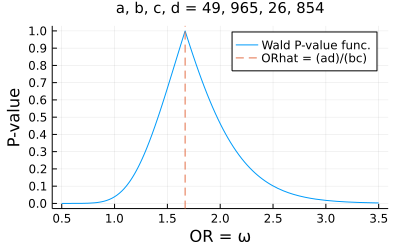

In [15]:
a, b, c, d = 49, 965, 26, 854
plot(ω -> pvalue_or_wald(a,b,c,d; ω), 0.5, 3.5; label="Wald P-value func.")
vline!([oddsratiohat(a,b,c,d)]; label="ORhat = (ad)/(bc)", ls=:dash)
plot!(; xguide="OR = ω", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, b, c, d = $a, $b, $c, $d")

このようにWald版P値函数は, $\omega = \ORhat = (ad)/(bc)$ で最大値の $1$ になり, 「とんがり帽子」型のグラフになる.

#### R言語でのWald版のオッズ比に関するP値と信頼区間の計算の仕方

定義通りにコードを入力すれば計算できる.

```R
a = 49
b = 965
c = 26
d = 854
omega = 1
ORhat = a*d/(b*c)
SEhat = sqrt(1/a + 1/b + 1/c + 1/d)
p.value = 2*(1 - pnorm(abs(log(ORhat) - log(omega))/SEhat))
alpha = 0.05
z = qnorm(1 - alpha/2)
conf.int = c(exp(-z*SEhat)*ORhat, exp(z*SEhat)*ORhat)

cat("data: a b c d = ", a, b, c, d, "\n")
cat("null hypothesis: OR = ", omega, "\n")
cat("ORhat = ", ORhat, "\n")
cat("SEhat = ", SEhat, "\n")
cat("p.value = ", p.value, "\n")
cat("conf.level = ", 1 - alpha, "\n")
cat("conf.int = ", conf.int, "\n")
```

In [16]:
R"""
a = 49
b = 965
c = 26
d = 854
omega = 1
ORhat = a*d/(b*c)
SEhat = sqrt(1/a + 1/b + 1/c + 1/d)
p.value = 2*(1 - pnorm(abs(log(ORhat) - log(omega))/SEhat))
alpha = 0.05
z = qnorm(1 - alpha/2)
conf.int = c(exp(-z*SEhat)*ORhat, exp(z*SEhat)*ORhat)

cat("data: a b c d = ", a, b, c, d, "\n")
cat("null hypothesis: OR = ", omega, "\n")
cat("ORhat = ", ORhat, "\n")
cat("SEhat = ", SEhat, "\n")
cat("p.value = ", p.value, "\n")
cat("conf.level = ", 1 - alpha, "\n")
cat("conf.int = ", conf.int, "\n")
""";

data: a b c d =  49 965 26 854 
null hypothesis: OR =  1 
ORhat =  1.667836 
SEhat =  0.2471375 
p.value =  0.03847043 
conf.level =  0.95 
conf.int =  1.027518 2.70718 


$95\%$ 信頼区間はepiR パッケージを使えば

```R
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = epiR::epi.2by2(A, digits=4, conf.level=0.95)
```

で計算できる. 色々表示されるが,

```
Odds ratio                                     1.6678 (1.0275, 2.7072)
```

の行の括弧の内側にWald版の信頼区間が表示されている.

In [17]:
R"""
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = epiR::epi.2by2(A, digits=4, conf.level=0.95)
"""

RObject{VecSxp}
             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +           49          965       1014              4.83      0.0508
Exposed -           26          854        880              2.95      0.0304
Total               75         1819       1894              3.96      0.0412

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 1.6356 (1.0254, 2.6088)
Odds ratio                                     1.6678 (1.0275, 2.7072)
Attrib risk in the exposed *                   1.8778 (0.1475, 3.6081)
Attrib fraction in the exposed (%)            38.8590 (2.4779, 61.6679)
Attrib risk in the population *                1.0053 (-0.4170, 2.4276)
Attrib fraction in the population (%)         25.3879 (-1.2434, 45.0140)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 4.368 Pr>chi2 = 0.037
Fisher exact 

### 確率変数の対数オッズ比の分散の近似値の導出

この節では $a,b,c,d$ は2つの二項分布モデルに従う確率変数であるとし,

$$
\phat = \frac{a}{a+b} = \frac{a}{m}, \quad
\qhat = \frac{c}{c+d} = \frac{c}{n}
$$

とおく.  これの対数オッズ比

$$
\log\ORhat = \log\frac{a/b}{c/d} =
\log\frac{\phat/(1-\phat)}{\qhat(1-\qhat)} =
\log\frac{\phat}{1-\phat} + \log\frac{\qhat}{1-\qhat}
$$

の分散の近似値を求めたい. $a\sim\Binomial(m,p)$, $c\sim\Binomial(n,q)$ なので, 二項分布の中心極限定理より,

$$
\phat \sim \Normal\left(p, \sqrt{\frac{p(1-p)}{m}}\right), \quad
\qhat \sim \Normal\left(q, \sqrt{\frac{q(1-q)}{n}}\right), \quad\text{approximately}.
$$

$a,c$ は独立なので $\phat,\qhat$ も独立になる.

$f(t) = \log(t/(1-t)) = \log(1/(1-t)-1)$ とおくと, $f'(t) = ((1-t)/t)(1/(1-t)^2) = 1/(t(1-t))$ なので,

$$
\log\frac{\phat}{1-\phat} =
\frac{p}{1-p} + \frac{\phat - p}{p(1-p)} + O((\phat-p)^2).
$$

これより, デルタ法を使って, 次の近似が得られる:

$$
\log\frac{\phat}{1-\phat} \sim
\Normal\left(\log\frac{p}{1-p}, \frac{1}{\sqrt{mp(1-p)}}\right),
\quad\text{approximately}.
$$

同様にして,

$$
\log\frac{\qhat}{1-\qhat} \sim
\Normal\left(\log\frac{q}{1-q}, \frac{1}{\sqrt{nq(1-q)}}\right),
\quad\text{approximately}.
$$

デルタ法については

* [「大数の法則と中心極限定理」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/05%20Central%20limit%20theorem.ipynb)

に解説がある. しかし, 上のように単に一次近似するだけの話に過ぎないので, 自分でよく考えればそちらの解説を読む必要はない可能性が高い.

一般に $X,Y$ が独立な確率変数で $X\sim\Normal(\mu_X, \sigma_X)$, $Y\sim\Normal(\mu_Y, \sigma_Y)$ のとき, $X+Y\sim\Normal\left(\mu_X+\mu_Y, \sqrt{\sigma_X^2+\sigma_Y^2}\right)$ となる.  そして,

$$
\begin{aligned}
\left(\frac{1}{\sqrt{mp(1-p)}}\right)^2 +
\left(\frac{1}{\sqrt{nq(1-q)}}\right)^2 &=
\frac{1}{mp(1-p)} +
\frac{1}{nq(1-q)}
\\ &=
\frac{1}{mp} + \frac{1}{m(1-p)} + \frac{1}{nq} + \frac{1}{n(1-q)}
\end{aligned}
$$

なので, 

$$
\SE_{\log\ORhat} =
\sqrt{\frac{1}{mp} + \frac{1}{m(1-p)} + \frac{1}{nq} + \frac{1}{n(1-q)}}
$$

とおいて, $\log\ORhat$ の定義と

$$
\log\OR = \log\frac{p/(1-p)}{q/(1-q)} =
\log\frac{p}{1-p} - \log\frac{q}{1-q}
$$

を使うと, 

$$
\log\ORhat \sim
\Normal\left(\log\OR, \SE_{\log\ORhat} \right), \quad\text{approximately}
$$

となることがわかる.

もしも $mp, m(1-p), nq, n(1-q)$ のそれぞれを $a,b,c,d$ で近似できるならば, $\SE$ の中の $mp, m(1-p), nq, n(1-q)$ のそれぞれを $a,b,c,d$ で置き換えて,

$$
\SEhat_{\log\ORhat} =
\sqrt{\frac{1}{a} + \frac{1}{b} + \frac{1}{c} + \frac{1}{d}}
$$

を作って,

$$
\log\ORhat \sim
\Normal\left(\log\OR, \SEhat_{\log\ORhat} \right), \quad\text{approximately}
$$

という近似が得られる.  この近似のもとで

$$
\frac{\log\ORhat - \log\OR}{\SEhat_{\log\ORhat}} \sim \Normal(0,1), \quad\text{approximately}.
$$

__注意:__ 以上のような議論ではハット付きの $\ORhat$ とハットが付いていない $\OR$ の区別が曖昧になると理解できなくなる. ハットが付いていない $\OR = (p/(1-p))/(q/(1-q))$ はモデルのパラメータ $p,q$ で書かれた量であり, ハットが付いている $\ORhat = (a/b)/(c/d)$ はモデルに従う確率変数 $a,b,c,d$ で書かれた量になっていることに注意すれば区別がし易くなるだろう.  実際にその方法で $\SE_{\log\ORhat}$ と $\SEhat_{\log\ORhat}$ の区別を容易にできることを確認してみよ.

__注意:__ ハット付きの記号はデータの数値で表された同様の量にもそのまま流用されるので, 文脈によって, 確率変数になっているかと, データの数値から計算された数値になっているかを区別しなければいけない.  この問題はモデル内の確率変数とデータの数値から計算さらた数値を記号的にも区別できるようにすれば解決するのだが, 実際にやってみればわかるように, 記号が煩雑過ぎるという点でつらくなる場合が多数出て来る.  しかし, 初学者にとって「文脈を利用して正しく解釈すること」は難しい場合があるので, 実際に難しいと感じる人は, 文脈に頼らずに記号を見ただけで区別できるように書かれたノートを __自分で__ 作成してみるとよいだろう.  (おそらくそれを本当に実行した人は結果的に文脈を利用して正しく解釈することが楽にできるようになるだろう.)

### 問題: 対数リスク比の場合の正規分布近似

$a,b,c,d$ は2つの二項分布モデルに従う確率変数であるとし, $\phat = a/m$, $\qhat = c/n$ とおき, それらに関する確率変数としての対数リスク比を次のように定める:

$$
\log\RRhat = \log\frac{\phat}{\qhat} = \log\phat - \log\qhat.
$$

このとき, 

$$
\log\RR = \log\frac{p}{q}, \quad
\SEhat_{\log\RRhat} =
\sqrt{\frac{1}{a} - \frac{1}{a+b} + \frac{1}{c} - \frac{1}{c+d}}
$$

とおくと, 二項分布の中心極限定理を使って, 次の近似が得られることを示せ:

$$
\log\RRhat \sim
\Normal\left(\log\RR, \SEhat_{\log\RRhat}\right), \quad\text{approximately}.
$$

__解答例:__ デルタ法を利用する.  $f(t)=\log t$ とおくと, $f'(t)=1/t$ なので,

$$
\log\phat = \log p + \frac{\phat - p}{p} + O((\phat-p)^2).
$$

これと二項分布の中心極限定理より近似的に $\phat \sim \Normal\left(p, \sqrt{p(1-p)/m}\right)$ となるので次の近似を得る:

$$
\log\phat \sim
\Normal\left(\log p, \sqrt{\frac{1-p}{mp}}\right), \quad\text{approximately}.
$$

同様にして,

$$
\log\qhat \sim
\Normal\left(\log q, \sqrt{\frac{1-q}{nq}}\right), \quad\text{approximately}.
$$

ゆえに, $\SE_{\log\RRhat}$ を

$$
\begin{aligned}
\SE_{\log\RRhat} &=
\sqrt{\frac{1-p}{mp} + \frac{1-q}{nq}} 
\\ &=
\sqrt{\frac{1}{mp} - \frac{1}{m} + \frac{1}{nq} - \frac{1}{n}}
\end{aligned}
$$

と定めると,

$$
\log\RRhat \sim
\Normal\left(\log\RR, \SE_{\log\RRhat}\right), \quad\text{approximately}.
$$

ゆえにもしも, $mp, nq$ のそれぞれを $a,c$ で近似できるならば, $a+b=m$, $c+d=n$ も使って

$$
\log\RRhat \sim
\Normal\left(\log\RR, \SEhat_{\log\RRhat}\right), \quad\text{approximately}.
$$

が得られる.

__解答終__

### 問題: Wald版のリスク比に関するP値と信頼区間の定義

上の問題の結果を用いてWald版のリスク比に関するP値と信頼区間を適切に定義せよ.

__注意:__ 数学的にややこしい事柄を理解したい場合には「定義だけは最初に覚えなければいけない」のように考えると失敗することが多い.  適切な定義を自分で作れるような考え方をした方がよい.  この問題を適切に解けた人は今度は自力でP値と信頼区間を適切に定義して自由自在に使えるようになるだろう.

__解答例:__ 現実世界における調査によって2×2の分割表のデータの数値 $a,b,c,d$ が得られているとする. そのデータの数値の対数リスク比を次のように定める:

$$
\log\RRhat = \frac{a/(a+b)}{c/(c+d)}.
$$

仮説「リスク比パラメータは $\RR=\rho$ である」の下での2つの二項分布モデル内でランダムに生成されたデータの対数リスク比が現実世界で得たデータの対数リスク比以上に $\RR=\rho$ から離れる確率の近似値として, 「リスク比パラメータは $\RR=\rho$ である」という仮説のP値を定める:

$$
\pvalue_{\Wald}(a,b,c,d|\RR=\rho) =
2\left(
1 - \cdf\left(\Normal(0,1), \frac{\left|\log\RRhat - \log\rho\right|}{\SEhat_{\log\RRhat}}\right)
\right).
$$

ここで1つ前の問題の結果と記号

$$
\SEhat_{\log\RRhat} =
\sqrt{\frac{1}{a} - \frac{1}{a+b} + \frac{1}{c} - \frac{1}{c+d}}
$$

を使った. このP値に定義に対応する対数リスク比パラメータ $\log\RR$ の信頼度 $1-\alpha$ の信頼区間は

$$
\confint^{\log\RR}_{\Wald}(a,b,c,d|\alpha) =
\left[
\log\RRhat - z_{\alpha/2}\SEhat_{\log\RRhat},\;
\log\RRhat + z_{\alpha/2}\SEhat_{\log\RRhat}
\right]
$$

になり, リスク比パラメータ $\RR$ の信頼度 $1-\alpha$ の信頼区間は

$$
\confint^{\RR}_{\Wald}(a,b,c,d|\alpha) =
\left[
\exp\left(-z_{\alpha/2}\SEhat_{\log\RRhat}\right)\RRhat,\;
\exp\left( z_{\alpha/2}\SEhat_{\log\RRhat}\right)\RRhat
\right]
$$

になる.  ここで $z_{\alpha/2}=\cdf(\Normal(0,1), 1-\alpha/2)$.

### 問題: Wald版のリスク比に関するP値と信頼区間の計算例

データが次の場合のWald版の仮説「リスク比パラメータは $\RR=1$ である」のP値とリスク比パラメータ $\RR$ の $95\%$ 信頼区間を計算してみよ:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

#### Julia言語によるWald版のリスク比に関するP値と信頼区間の計算の仕方

In [18]:
a, b, c, d = 49, 965, 26, 854
@show riskratiohat(a, b, c, d)
@show pvalue_rr_wald(a, b, c, d; ρ=1)
@show confint_rr_wald(a, b, c, d; α = 0.05);

riskratiohat(a, b, c, d) = 1.635563647397967
pvalue_rr_wald(a, b, c, d; ρ = 1) = 0.038895117565198624
confint_rr_wald(a, b, c, d; α = 0.05) = [1.025408984412048, 2.6087819449169145]


#### Julia言語によるWald版のリスク比に関するP値函数の視覚化

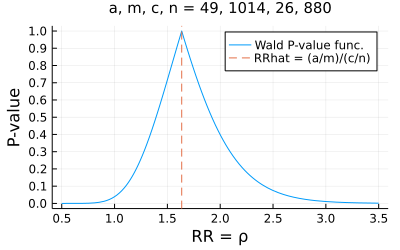

In [19]:
a, b, c, d = 49, 965, 26, 854
plot(ρ -> pvalue_rr_wald(a,b,c,d; ρ), 0.5, 3.5; label="Wald P-value func.")
vline!([riskratiohat(a,b,c,d)]; label="RRhat = (a/m)/(c/n)", ls=:dash)
plot!(; xguide="RR = ρ", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, m, c, n = $a, $(a+b), $c, $(c+d)")

#### R言語によるWald版のリスク比に関する信頼区間の計算の仕方

epiRパッケージをRにインストールしておけば,

```R
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = epiR::epi.2by2(A, digits=4, conf.level=0.95)
```

でWald版のリスク比に関する信頼区間を計算できる.  色々表示されているが,

```
Inc risk ratio                                 1.6356 (1.0254, 2.6088)
```

の行の括弧の中に信頼区間が表示されている.

In [20]:
R"""
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = epiR::epi.2by2(A, digits=4, conf.level=0.95)
"""

RObject{VecSxp}
             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +           49          965       1014              4.83      0.0508
Exposed -           26          854        880              2.95      0.0304
Total               75         1819       1894              3.96      0.0412

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 1.6356 (1.0254, 2.6088)
Odds ratio                                     1.6678 (1.0275, 2.7072)
Attrib risk in the exposed *                   1.8778 (0.1475, 3.6081)
Attrib fraction in the exposed (%)            38.8590 (2.4779, 61.6679)
Attrib risk in the population *                1.0053 (-0.4170, 2.4276)
Attrib fraction in the population (%)         25.3879 (-1.2434, 45.0140)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 4.368 Pr>chi2 = 0.037
Fisher exact 

#### Wald版のリスク比に関するP値と信頼区間の計算例の問題の解答例

* (Wald版の仮説「リスク比パラメータは $\RR=1$ である」のP値) ≈ 3.890%
* (Wald版のリスク比パラメータ $\RR$ の $95\%$ 信頼区間) ≈ \[1.0254, 2.6088\]

__注意:__ この場合にはリスク比がオッズ比で近似される場合になっている.

In [21]:
a, b, c, d = 49, 965, 26, 854
@show riskratiohat(a, b, c, d)
@show oddsratiohat(a, b, c, d)
@show pvalue_rr_wald(a, b, c, d; ρ=1)
@show pvalue_or_wald(a, b, c, d; ω=1)
@show confint_rr_wald(a, b, c, d; α = 0.05)
@show confint_or_wald(a, b, c, d; α = 0.05);

riskratiohat(a, b, c, d) = 1.635563647397967
oddsratiohat(a, b, c, d) = 1.6678357911518533
pvalue_rr_wald(a, b, c, d; ρ = 1) = 0.038895117565198624
pvalue_or_wald(a, b, c, d; ω = 1) = 0.03847043006362489
confint_rr_wald(a, b, c, d; α = 0.05) = [1.025408984412048, 2.6087819449169145]
confint_or_wald(a, b, c, d; α = 0.05) = [1.0275181208761617, 2.7071797272783877]


### 問題: 比率の差の場合の正規分布近似

$a,b,c,d$ は2つの二項分布モデルに従う確率変数であるとし, $\phat = a/m$, $\qhat = c/n$ とおき,  $\SEhat_{\phat-\qhat}$ を

$$
\SEhat_{\phat-\qhat} =
\sqrt{\frac{\phat(1-\phat)}{m} + \frac{\qhat(1-\qhat)}{n}}
$$

と定める. このとき, 二項分布の中心極限定理から, 次の近似が得られることを示せ:

$$
\phat - \qhat \sim
\Normal\left(p - q, \SEhat_{\phat-\qhat}\right) 
\quad\text{approximately}.
$$

__解答例:__ 二項分布の中心極限定理によって,

$$
\phat\sim\Normal\left(p, \sqrt{\frac{p(1-p)}{m}}\right), \quad
\qhat\sim\Normal\left(q, \sqrt{\frac{q(1-q)}{n}}\right), \quad
\text{approximately}.
$$

$\phat, \qhat$ が独立であることと, 正規分布に従う独立な確率変数達の和が分散がそれらの分散の和であるような正規分布に従うことより,

$$
\SE_{\phat-\qhat} = \sqrt{\frac{p(1-p)}{m} + \frac{q(1-q)}{n}}
$$

とおくと,

$$
\phat - \qhat \sim
\Normal\left(q, \SE_{\phat-\qhat}\right), \quad
\text{approximately}.
$$

ゆえに, $p,q$ が $\phat$, $\qhat$ で近似できているならば,

$$
\phat - \qhat \sim
\Normal\left(q, \SEhat_{\phat-\qhat}\right), \quad
\text{approximately}.
$$

__解答終__

### 問題: Wald版の比率の差に関するP値と信頼区間の定義

上の問題の結果を利用して, 仮説「$p-q=\Delta$」のP値とパラメータ $p-q$ の信頼区間を適切に定義せよ.

__解答例:__ 仮説「$p-q=\Delta$」のP値を

$$
\SEhat_{\phat-\qhat} =
\sqrt{\frac{\phat(1-\phat)}{m} + \frac{\qhat(1-\qhat)}{n}}
$$

を用いて,

$$
\pvalue_{\Wald}(a,b,c,d|p-q=\Delta) =
2\left(
1 - \cdf\left(\Normal(0,1), \frac{|\phat - \qhat - \Delta|}{\SEhat_{\phat-\qhat}}\right)
\right)
$$

と定める.  対応する信頼度 $1-\alpha$ の信頼区間は次のようになる.

$$
\confint^{p-q}_{\Wald}(a,b,c,d|\alpha) =
\left[
\phat - \qhat - z_{\alpha/2}\SEhat_{\phat-\qhat},\;
\phat - \qhat + z_{\alpha/2}\SEhat_{\phat-\qhat}
\right].
$$

ただし $z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2)$ (標準正規分布において $z_{\alpha/2}$ 以上になる確率は $\alpha/2$)である.

__解答終__

### 問題: Wald版の比率の差に関するP値と信頼区間の計算例

データが次の場合のWald版の仮説「$p-q=0$」のP値と $p-q$ の $95\%$ 信頼区間を計算してみよ:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

#### Julia言語によるWald版の比率の差に関するP値と信頼区間の計算の仕方

以下のようにほぼ定義通りにコードを書けば計算できる.

```julia
riskdiffhat(a, b, c, d) = a/(a+b) - c/(c+d)

function stderr_riskdiffhat(a, b, c, d)
    m, n = a+b, c+d
    p̂, q̂ = a/m, c/n
    √(p̂*(1-p̂)/m + q̂*(1-q̂)/n)
end

function pvalue_rd_wald(a, b, c, d; Δ=0)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(RDhat - Δ), SEhat_riskdiffhat))
end

function confint_rd_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RDhat = riskdiffhat(a, b, c, d)
    SEhat_riskdiffhat = stderr_riskdiffhat(a, b, c, d)
    [RDhat - z*SEhat_riskdiffhat, RDhat + z*SEhat_riskdiffhat]
end
```

In [22]:
a, b, c, d = 49, 965, 26, 854
@show pvalue_rd_wald(a, b, c, d; Δ=0)
@show confint_rd_wald(a, b, c, d; α=0.05);

pvalue_rd_wald(a, b, c, d; Δ = 0) = 0.033414467036392496
confint_rd_wald(a, b, c, d; α = 0.05) = [0.0014752114457742202, 0.03608082226410564]


#### Wald版の比率の差に関するP値と信頼区間の計算の解答例

仮説「$p-q=0$」のP値: 0.03341
$p-q$ の $95\%$ 信頼区間: \[0.001475, 0.03608\]

## 必修問題: Wald版のオッズ比とリスク比のP値と信頼区間

$$
\begin{array}{c|c|c|c}
& \text{症状悪化} & \text{悪化せず} & \text{合計} \\
\hline
\text{薬Iを処方} & 100 &  579 &  679 \\
\hline
\text{プラセボ}  & 111 &  568 &  679 \\
\hline
\text{合計}      & 211 & 1147 & 1358 \\ 
\end{array}
$$

この表は次の論文

* Gilmar Reis, M.D., Ph.D. et al., Effect of Early Treatment with Ivermectin among Patients with Covid-19, N Engl J Med 2022; 386:1721-1731. \[[link](https://www.nejm.org/doi/full/10.1056/NEJMoa2115869)\]

の Table 2 から [Intention-to-treat population](https://www.google.com/search?q=Intention-to-treat)の部分だけを抜き出したものである.  「症状悪化」の正確な意味などに関する詳しい説明は論文を参照せよ.

上のデータについて, Wald版の以下のP値と信頼区間を計算せよ:

(1) 仮説「オッズ比パラメータは $\OR=1.0$ である」のP値

(2) 仮説「オッズ比パラメータは $\OR=0.5$ である」のP値

(3) オッズ比パラメータの $95\%$ 信頼区間

可能ならば, 前節の問題の解答例を見ながら, 以下も計算してみよ:

(4) 仮説「リスク比パラメータは $\RR=1.0$ である」のP値

(5) 仮説「リスク比パラメータは $\RR=0.5$ である」のP値

(6) リスク比パラメータの $95\%$ 信頼区間

### WolframAlphaによる必修問題の解答例

(1)

$\SEhat_{\log\ORhat}$ の計算:

`sqrt(1/a+1/b+1/c+1/d) where a=100.0, b=579, c=111, d=568` → [実行](https://www.wolframalpha.com/input?i=sqrt%281%2Fa%2B1%2Fb%2B1%2Fc%2B1%2Fd%29+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568) → 0.149989

$(\log\ORhat - \log 1)/\SEhat_{\log\ORhat}$ の計算:

`log(a*d/(b*c))/0.149989 where a=100.0, b=579, c=111, d=568` → [実行](https://www.wolframalpha.com/input?i=log%28a*d%2F%28b*c%29%29%2F0.149989+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568) → -0.823668

P値の計算:

`2(1 - cdf(NormalDistrubution(0,1), 0.823668))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28NormalDistrubution%280%2C1%29%2C+0.823668%29%29) → 0.410128 ((1)のP値)

(2)

$(\log\ORhat - \log 0.5)/\SEhat_{\log\ORhat}$ の計算:

`(log(a*d/(b*c)) - log(0.5))/0.149989 where a=100.0, b=579, c=111, d=568` → [実行](https://www.wolframalpha.com/input?i=%28log%28a*d%2F%28b*c%29%29+-+log%280.5%29%29%2F0.149989+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568) → 3.79765

P値の計算:

`2(1 - cdf(NormalDistrubution(0,1), 3.79765))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28NormalDistrubution%280%2C1%29%2C+3.79765%29%29) → 0.000146074 ((2)のP値)

(3)

$\alpha=0.05$ のときの $z_{\alpha/2}$ の計算:

`quantile(NormalDistribution(0,1), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.975%29) → 1.95996

オッズ比パラメータの信頼区間の計算:

`{exp(-0.149989z)*a*d/(b*c), exp(0.149989z)*a*d/(b*c)} where a=100.0, b=579, c=111, d=568, z=1.95996` → [実行](https://www.wolframalpha.com/input?i=%7Bexp%28-0.149989z%29*a*d%2F%28b*c%29%2C+exp%280.149989z%29*a*d%2F%28b*c%29%7D+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568%2C+z%3D1.95996) → {0.658683, 1.18582} ((3)の信頼区間)

(4)

$\SEhat_{\log\RRhat}$ の計算:

`sqrt(1/a-1/(a+b)+1/c-1/(c+d)) where a=100.0, b=579, c=111, d=568` → [実行](https://www.wolframalpha.com/input?i=sqrt%281%2Fa-1%2F%28a%2Bb%29%2B1%2Fc-1%2F%28c%2Bd%29%29+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568) → 0.126742

$(\log\RRhat - \log 1)/\SEhat_{\log\RRhat}$ の計算:

`log(a*(c+d)/((a+b)*c))/0.126742 where a=100.0, b=579, c=111, d=568` → [実行](https://www.wolframalpha.com/input?i=log%28a*%28c%2Bd%29%2F%28%28a%2Bb%29*c%29%29%2F0.126742+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568) → -0.823405

P値の計算:

`2(1 - cdf(NormalDistrubution(0,1), 0.823405))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28NormalDistrubution%280%2C1%29%2C+0.823405%29%29) → 0.410278 ((4)のP値)

(5)

$(\log\RRhat - \log 0.5)/\SEhat_{\log\RRhat}$ の計算:

`(log(a*(c+d)/((a+b)*c)) - log(0.5))/0.126742 where a=100.0, b=579, c=111, d=568` → [実行](https://www.wolframalpha.com/input?i=%28log%28a*%28c%2Bd%29%2F%28%28a%2Bb%29*c%29%29+-+log%280.5%29%29%2F0.126742+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568) → 4.64556

P値の計算:

`2(1 - cdf(NormalDistrubution(0,1), 4.64556))` → [実行](https://www.wolframalpha.com/input?i=2%281+-+cdf%28NormalDistrubution%280%2C1%29%2C+4.64556%29%29) → 3.39155×10^-6 = 3.39155e-6 ((5)のP値)

このP値は極めて小さい. 2つの二項分布モデルに関するリスク比が $0.5$ であるという仮説はデータとの整合性がほとんどないと考えられる. (この場合にリスク比が $0.5$ であることは症状が悪化することが半分に減るという意味になるが, モデル内におけるその想定はP値が小さ過ぎるという理由で否定される.)

(6)

$\alpha=0.05$ のときの $z_{\alpha/2}$ の計算:

`quantile(NormalDistribution(0,1), 0.975)` → [実行](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.975%29) → 1.95996

リスク比パラメータの信頼区間の計算:

`{exp(-0.126742z)*a*(c+d)/((a+b)*c), exp(0.126742z)*a*(c+d)/((a+b)*c)} where a=100.0, b=579, c=111, d=568, z=1.95996` → [実行](https://www.wolframalpha.com/input?i=%7Bexp%28-0.126742z%29*a*%28c%2Bd%29%2F%28%28a%2Bb%29*c%29%2C+exp%280.126742z%29*a*%28c%2Bd%29%2F%28%28a%2Bb%29*c%29%7D+where+a%3D100.0%2C+b%3D579%2C+c%3D111%2C+d%3D568%2C+z%3D1.95996) → {0.702739, 1.15494} ((6)の信頼区間)


### Julia言語による必修問題の解答例

Julia言語のシンプルな使い方については

* [Julia言語を使った統計学の勉強の仕方](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/07-2%20How%20to%20use%20Julia%20language%20for%20learning%20statistics.ipynb)

を参照せよ.

分子が $0$ ならば何で割っても $0$ になり, 分母が無限大なら分子が何であっても $0$ になる割り算の定義:

```julia
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y
```

これを使うと浮動小数点数に関する計算が少し安全になる場合がある. 

`0/0` は非数 `NaN` になる. 計算の途中で `NaN` が生じることを防ぎたい.  `1/0` は無限大 `Inf` になる.  `Inf` は悪さをせずに済むことがある.  ただし, `Inf - Inf` や `Inf/Inf` も `NaN` になるので注意が必要である.

In [23]:
@show 0/0 1/0 Inf-Inf Inf/Inf;

0 / 0 = NaN
1 / 0 = Inf
Inf - Inf = NaN
Inf / Inf = NaN


__オッズ比に関するWald版のP値と信頼区間を計算する函数__

ほぼ定義通りにコードが記述されている.

```julia
oddsratiohat(a, b, c, d) = safediv(a*d, b*c)
stderr_logoddsratiohat(a, b, c, d) = √(1/a + 1/b + 1/c + 1/d)

function pvalue_or_wald(a, b, c, d; ω=1)
    logORhat = log(oddsratiohat(a, b, c, d))
    SEhat_logORhat = stderr_logoddsratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logORhat - log(ω)), SEhat_logORhat))
end

function confint_or_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    ORhat = oddsratiohat(a, b, c, d)
    SEhat_logORhat = stderr_logoddsratiohat(a, b, c, d)
    [exp(-z*SEhat_logORhat)*ORhat, exp(z*SEhat_logORhat)*ORhat]
end
```

__リスク比に関するWald版のP値と信頼区間を計算する函数__

ほぼ定義通りにコードが記述されている.

```julia
riskratiohat(a, b, c, d) = safediv(a*(c+d), (a+b)*c)
stderr_logriskratiohat(a, b, c, d) = √(1/a - 1/(a+b) + 1/c - 1/(c+d))

function pvalue_rr_wald(a, b, c, d; ρ=1)
    logRRhat = log(riskratiohat(a, b, c, d))
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logRRhat - log(ρ)), SEhat_logRRhat))
end

function confint_rr_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    RRhat = riskratiohat(a, b, c, d)
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    [exp(-z*SEhat_logRRhat)*RRhat, exp(z*SEhat_logRRhat)*RRhat]
end
```

In [24]:
a, b, c, d = 100, 579, 111, 568

(100, 579, 111, 568)

In [25]:
# (1)
@show pvalue_or_wald(a, b, c, d; ω=1.0);

pvalue_or_wald(a, b, c, d; ω = 1.0) = 0.4101283497257791


In [26]:
# (2)
@show pvalue_or_wald(a, b, c, d; ω=0.5);

pvalue_or_wald(a, b, c, d; ω = 0.5) = 0.0001460722899582654


In [27]:
# (3)
@show confint_or_wald(a, b, c, d; α=0.05);

confint_or_wald(a, b, c, d; α = 0.05) = [0.6586822480003675, 1.1858168777394855]


In [28]:
# (4)
@show pvalue_rr_wald(a, b, c, d; ρ=1.0);

pvalue_rr_wald(a, b, c, d; ρ = 1.0) = 0.4102771459204757


In [29]:
# (4)
@show pvalue_rr_wald(a, b, c, d; ρ=0.5);

pvalue_rr_wald(a, b, c, d; ρ = 0.5) = 3.391523737996353e-6


In [30]:
# (6)
@show confint_rr_wald(a, b, c, d; α=0.05);

confint_rr_wald(a, b, c, d; α = 0.05) = [0.7027391487578177, 1.1549412533494148]


### 必修問題解答例

(1) 0.4101

(2) 0.0001461

(3) \[0.6587, 1.1858\]

(4) 0.4103

(5) 3.392e-6

(6) \[0.7027, 1.1549\]

## Pearsonのχ²検定版のオッズ比に関するP値と信頼区間

### Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の定義

天下り的になってしまい非常に申し訳ないのだが, オッズ比に関するP値のPearsonのχ²検定版を以下のように定義する.  特にP値の構成法の(1)の段階がひどく天下り的である(後でWilks' theoremへの帰着の仕方を説明する).  しかし, それ以外の部分については計算の筋道を詳しく書いておくので, 自分の手で計算して確認して欲しい.

そして, さらに, それだけだとどういうことなのか分かりにくいので, 後の方で示す具体的な数値の計算例と以下で説明する各ステップの対応を繰り返し確認して欲しい.

__検定したい仮説:__ 検定したい仮説は

$$
\text{オッズ比パラメータは $\OR = \omega$ である.}
$$

であるとする.  ここで $\omega > 0$ は具体的な正の実数である.

仮説が $\OR = 1$ である場合に, 以下で定義するP値はちょうど __独立性に関するPearsonのχ²検定__ で使うP値になっている.

__P値の構成法:__ オッズ比パラメータの値に関する仮説のP値のPearsonのχ²検定版の構成法は以下の通り.

(1) 分割表のデータの数値 $a,b,c,d$ に対して, 次を満たす $\delta=\delta(a,b,c,d|\omega)$ を求める:

$$
\frac{(a-\delta)(d-\delta)}{(b+\delta)(c+\delta)} = \omega,
\quad -\min(b,c) \le \delta \le \min(a,d).
$$

これの左側の等式は

$$
A = 1 - \omega, \quad
B = a + d + \omega(b + c), \quad
C = ad - \omega bc
$$

とおくと, 次の二次方程式に書き直される:

$$
A \delta^2 - B \delta + C = 0.
$$

これの解で $-\min(b,c) \le \delta \le \min(a,d)$ を満たす側が欲しい $\delta=\delta(a,b,c,d|\omega)$ である. それは次のように表される:

$$
\delta = \delta(a,b,c,d|\omega) = \frac{2C}{B + \sqrt{B^2 - 4AC}}.
$$

この表示で浮動小数点数の計算をした方が安全でかつ誤差も小さくなり易い.

特に $\omega = 1$ の場合(独立性検定の場合)には, $\delta$ を決める方程式は $-(a+b+c+d)\delta + ad-bc=0$ になるので,

$$
\omega = 1 \implies \delta = \delta(a,b,c,d|1) = \frac{ad-bc}{a+b+c+d} = \frac{ad-bc}{N}.
$$

(2) $\ta,\tb,\tc,\td$ を次のように定める:

$$
\ta = a - \delta, \quad
\tb = b + \delta, \quad
\tc = c + \delta, \quad
\td = d - \delta.
$$

これが実は仮説 $\OR=1$ 下での期待値の最尤推定値になっていることを後の方の節で説明する.

特に $\omega = 1$ の場合(独立性検定の場合)には次のようになっている:

$$
\omega = 1 \implies
\begin{cases}
\;
\ta = \dfrac{(a+b)(a+c)}{N} = \dfrac{ms}{N}, &
\tb = \dfrac{(a+b)(b+d)}{N} = \dfrac{mr}{N},
\\ \;
\tc = \dfrac{(c+d)(a+c)}{N} = \dfrac{ns}{N}, &
\td = \dfrac{(c+d)(b+d)}{N} = \dfrac{nr}{N}.
\end{cases}
$$

(3) データの数値に対応するPearsonのχ²統計量 $\chi^2 = \chi^2(a,b,c,d|\delta)$ の値を次のように定める:

$$
\begin{aligned}
\chi^2 &= \chi^2(a,b,c,d|\delta) =
\delta^2
\left(
\frac{1}{a-\delta} +
\frac{1}{b+\delta} +
\frac{1}{c+\delta} +
\frac{1}{d-\delta}
\right)
\\ &=
\frac{(a - \ta)^2}{\ta} +
\frac{(b - \tb)^2}{\tb} +
\frac{(c - \tc)^2}{\tc} +
\frac{(d - \td)^2}{\td}.
\end{aligned}
$$

ここで, $\delta = \delta(a,b,c,d|\omega)$ は $a,b,c,d,\omega$ のみを使って計算できる数値なので, この $\chi^2$ = \chi^2(a,b,c,d|\delta)$ も $a,b,c,d,\omega$ のみを使って計算できる数値になっている.

上の $\chi^2$ に関する後者の表示はPearsonのχ²統計量の一般的な表示

$$
\chi^2 =
\sum \frac{((観測値) - (帰無仮説下のモデル内での期待値))^2}{(帰無仮説下のモデル内での期待値)}
$$

の特別な場合になっていることに注意せよ. ただし, 「帰無仮説下のモデル内での期待値」は最尤推定値として求めたものになっている.


特に $\omega = 1$ の場合(独立性検定の場合)には次のようになっている:

$$
\chi^2 = \frac{N(ad-bc)^2}{(a+b)(c+d)(a+c)(b+d)} =
\frac{N(ad-bc)^2}{mnrs}
$$

これは独立性に関するPearsonのχ²統計量の公式として有名である.

(4) 仮説 $\OR = \omega$ の下での統計モデル内で同様に定義されたPearsonのχ²統計量の値がデータから計算した $\chi^2$ の値以上になる確率の近似値としてP値を定義したい.  (一般にP値は, 統計モデル内でデータの数値以上に極端な場合が生じる確率またはその近似値として定義されるのであった.)

仮に $a,b,c,d$ が現実から得たデータの数値ではなく, 仮説 $\OR = \omega$ の下での統計モデル内でランダムに生成された仮想的なデータであるとき, (3)のように定義された $\chi^2$ は $a,b,c,d$ が十分に大きなとき(実はそう大きくなくてもよい), 近似的に自由度 $1$ のχ²分布に従うことを示せる.

このことを使って, 仮説 $\OR = \omega$ のP値を次のように定義する:

$$
\pvalue_{\Pearson}(a,b,c,d|\OR=\omega) =
1 - \cdf(\Chisq(1), \chi^2).
$$

仮説 $\OR = \omega$ に関するデータの数値 $a,b,c,d$ に関するPearsonのχ²統計量の値 $\chi^2 = \chi^2(a,b,c,d|\delta(a,b,c,d|\omega)$ は $a,b,c,d,\omega$ だけで計算される数値なので, これでP値が定義されている.

__対応する信頼区間:__ このP値の定義に対応するオッズ比パラメータ $\OR$ の信頼度 $1-\alpha$ の信頼区間は次のように定義される:

$$
\confint^{\OR}_{\Pearson}(a,b,c,d|\alpha) = 
\{\, \omega > 0 \mid \pvalue_{\Pearson}(a,b,c,d|\OR=\omega) \ge \alpha\,\}.
$$

この信頼区間を計算するために使えるシンプルな公式はないように思われる.

__信頼区間の計算法1:__ $\omega$ に関する次の方程式の解を2つ求めれば, その2つがオッズ比パラメータ $\OR$ の信頼区間の両端の値になる:

$$
\pvalue_{\Pearson}(a,b,c,d|\OR=\omega) = \alpha.
$$

__信頼区間の計算法2:__ まず, $\chi^2_{\nu,\alpha}$ を

$$
\chi^2_{\nu,\alpha} = \quantile(\Chisq(\nu), 1 - \alpha)
$$

と定める. そして, $-\min(b,c) < \delta < \min(a,d)$ と次を満たす $\delta$ を2つ求める:

$$
\chi^2(a,b,c,d|\delta) =
\delta^2
\left(
\frac{1}{a-\delta} +
\frac{1}{b+\delta} +
\frac{1}{c+\delta} +
\frac{1}{d-\delta}
\right) =
\chi^2_{1,\alpha}
$$

そして, それらの $\delta$ に対して, $\omega$ を

$$
\omega = \frac{(a-\delta)(d-\delta)}{(b+\delta)(c+\delta)}
$$

によって対応させれば, 信頼区間の両端の値が得られる.

__文献:__ この節の構成は次の論文に書いてある方法の連続補正無し版になっている:

* Jerome Cornfield, A Statistical Problem Arising from Retrospective Studies, Berkeley Symposium on Mathematical Statistics and Probability, 1956: 135-148 (1956)  [link](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings%20of%20the%20Third%20Berkeley%20Symposium%20on%20Mathematical%20Statistics%20and%20Probability,%20Volume%204:%20Contributions%20to%20Biology%20and%20Problems%20of%20Health/chapter/A%20Statistical%20Problem%20Arising%20from%20Retrospective%20Studies/bsmsp/1200502552)

### Pearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算例

データが次の場合のPearsonのχ²検定版仮説「オッズ比パラメータは $\OR=1$ である」のP値とオッズ比 $\OR$ の $95\%$ 信頼区間を計算してみよう:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

結果は次のようになる:

* (Pearsonのχ²検定版の仮説「オッズ比パラメータは $\OR=1$ である」のP値) ≈ 3.661%
* (Pearsonのχ²検定版のオッズ比パラメータ $\OR$ の $95\%$ 信頼区間) ≈ \[1.0318, 2.6957\]

信頼区間ついてはJulia言語版の計算例のみを示す.  WolframAlphaでこの信頼区間を求めることはかなり面倒である.

#### WolframAlphaによるPearsonのχ²検定のP値の計算の仕方

$\omega = 1$ の場合には, Pearsonのχ²統計量は,

$$
\chi^2 = \frac{(a+b+c+d)(ad-bc)^2}{(a+b)(c+d)(a+c)(b+d)}
$$

となるのであった. これを用いてP値を計算してみよう.

`(a+b+c+d)(ad-bc)^2/((a+b)(c+d)(a+c)(b+d)) where a=49.0, b=965, c=26, d=854` → [実行](https://www.wolframalpha.com/input?i=%28a%2Bb%2Bc%2Bd%29%28ad-bc%29%5E2%2F%28%28a%2Bb%29%28c%2Bd%29%28a%2Bc%29%28b%2Bd%29%29+where+a%3D49.0%2C+b%3D965%2C+c%3D26%2C+d%3D854) → 4.36824 (独立性に関するPearsonのχ²統計量)

`1 - cdf(ChisqDistribution(1), 4.36824)` → [実行](https://www.wolframalpha.com/input?i=1+-+cdf%28ChisqDistribution%281%29%2C+4.36824%29) → 0.0366148 (P値)

#### Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(1)

$\omega = 1$ の場合のPearsonのχ²検定版のオッズ比に関するP値は, 独立性に関するPearsonのχ²検定のP値そのものになる.  それを上でやったのと同じ方法で計算する.

信頼区間の側は函数の零点を見つけてくれる函数を使って求めてみよう.

In [31]:
a, b, c, d = 49, 965, 26, 854
@show a, b, c, d
χ² = (a+b+c+d)*(a*d-b*c)^2/((a+b)*(c+d)*(a+c)*(b+d))
@show χ²
@show pvalue = ccdf(Chisq(1), χ²)
α = 0.05
@show α
confint = find_zeros(0.5, 3.0) do ω
    A, B, C = 1-ω, a+d+ω*(b+c), a*d-ω*b*c
    δ = 2C/(B + √(B^2 - 4A*C))
    χ² = δ^2 * (1/(a-δ) + 1/(b+δ) + 1/(c+δ) + 1/(d-δ))
    ccdf(Chisq(1), χ²) - α
end
@show confint;

(a, b, c, d) = (49, 965, 26, 854)
χ² = 4.368235947209686
pvalue = ccdf(Chisq(1), χ²) = 0.03661487827607113
α = 0.05
confint = [1.031778110800563, 2.6957054358850328]


`f(x, y) do z ... end` 構文については

* https://docs.julialang.org/en/v1/manual/functions/#Do-Block-Syntax-for-Function-Arguments

を参照せよ.  `find_zeros` 函数の使い方については,

* https://juliamath.github.io/Roots.jl/stable/#Basic-usage

を参照せよ.

#### Julia言語によるPearsonのχ²検定版のオッズ比に関するP値と信頼区間の計算の仕方(2)

このノートブックの最初の方で定義した函数を使って計算.

In [32]:
a, b, c, d = 49, 965, 26, 854
@show a, b, c, d
@show chisqstat_or(a, b, c, d; ω=1)
@show pvalue_or_pearson(a, b, c, d; ω=1)
@show confint_or_pearson(a, b, c, d; α=0.05);

(a, b, c, d) = (49, 965, 26, 854)
chisqstat_or(a, b, c, d; ω = 1) = 4.368235947209686
pvalue_or_pearson(a, b, c, d; ω = 1) = 0.03661487827607113
confint_or_pearson(a, b, c, d; α = 0.05) = [1.031778110800563, 2.6957054358850328]


#### Julia言語によるPearsonのχ²検定版のオッズ比に関するP値の視覚化

まず, 次の函数のグラフを描いてみよう:

$$
\delta \mapsto
\chi^2(a,b,c,d|\delta) =
\delta^2
\left(
\frac{1}{a-\delta} +
\frac{1}{b+\delta} +
\frac{1}{c+\delta} +
\frac{1}{d-\delta}
\right).
$$

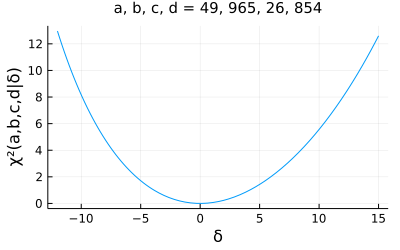

In [33]:
a, b, c, d = 49, 965, 26, 854
plot(δ -> _chisqstat_or(a,b,c,d,δ), -12, 15; label="")
plot!(; xguide="δ", yguide="χ²(a,b,c,d|δ)")
title!("a, b, c, d = $a, $b, $c, $d")

このように $\delta\mapsto\chi^2(a,b,c,d|\delta)$ は $\delta=0$ で最小値 $0$ になるU型のグラフになる.  ゆえに, $\delta$ に関する方程式 $\chi^2(a,b,c,d|\delta) = \chi^2_{1,\alpha}$ の $-\min(b,c) < \delta < \min(a,d)$ を満たす解は負値と正値の2つになる.

次に, P値函数 $\omega\mapsto\pvalue(a,b,c,d|\OR=\omega)$ のグラフを描いてみよう.

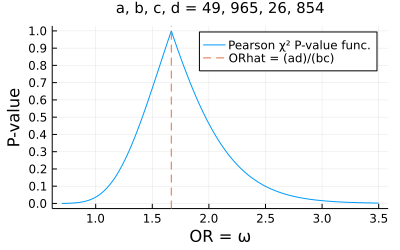

In [34]:
a, b, c, d = 49, 965, 26, 854
plot(ω -> pvalue_or_pearson(a,b,c,d;ω), 0.7, 3.5; label="Pearson χ² P-value func.")
vline!([oddsratiohat(a,b,c,d)]; label="ORhat = (ad)/(bc)", ls=:dash)
plot!(; xguide="OR = ω", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, b, c, d = $a, $b, $c, $d")

このようにP値函数 $\omega\mapsto\pvalue(a,b,c,d|\OR=\omega)$ は $\omega = \ORhat = (ad)/(bc)$ で最大値 $1$ になり, 「とんがり帽子」の形のグラフになる.

Wald版のP値函数のグラフと重ねてプロットすると次のようになる.

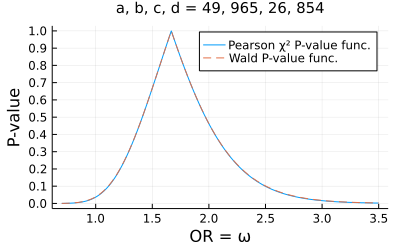

In [35]:
a, b, c, d = 49, 965, 26, 854
plot(ω -> pvalue_or_pearson(a,b,c,d; ω), 0.7, 3.5; label="Pearson χ² P-value func.")
plot!(ω -> pvalue_or_wald(a,b,c,d; ω), 0.7, 3.5; label="Wald P-value func.", ls=:dash)
plot!(; xguide="OR = ω", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, b, c, d = $a, $b, $c, $d")

この場合には $a,b,c,d$ が十分に大きいので, ほぼぴったり重なっている!

このことから, $a,b,c,d$ が十分に大きな場合には, 計算法が複雑なPearsonのχ²検定版のP値と信頼区間を使う必要がないことがわかる. そのような場合にはWald型のP値と信頼区間で実用的には十分である.

P値と $95\%$ 信頼区間も以下のようにほぼ同じになっている:

* P値の比較:
  * (Pearsonのχ²検定版の仮説「オッズ比パラメータは $\OR=1$ である」のP値) ≈ 3.7%
  * (Wald版の仮説「オッズ比パラメータは $\OR=1$ である」のP値) ≈ 3.8%

* 信頼区間の比較:
  * (Pearsonのχ²検定版のオッズ比パラメータ $\OR$ の $95\%$ 信頼区間) ≈ \[1.03, 2.70\]
  * (Wald版のオッズ比パラメータ $\OR$ の $95\%$ 信頼区間) ≈ \[1.03, 2.71\]

__数学的注意:__ 数学の世界では, 定義が全く異なる2つの量がある条件のもとで近似的によく一致するというようなことが起こる.  異なる動機や思想のもとで定義された2つの量が現実世界での応用では「同じ」とみなしてよいだけ近似的によく一致することがある.  そのような場合に元の動機や思想にこだわって解釈しようとすることは誤りである.

__注意:__ $a,b,c,d$ が小さい場合には違いが大きくなる場合がある.

In [36]:
a, b, c, d = 4, 1, 1, 5
@show pvalue_or_pearson(a,b,c,d)
@show pvalue_or_wald(a,b,c,d)
println()
@show confint_or_pearson(a,b,c,d)
@show confint_or_wald(a,b,c,d);

pvalue_or_pearson(a, b, c, d) = 0.03568232934330229
pvalue_or_wald(a, b, c, d) = 0.05563253253702121

confint_or_pearson(a, b, c, d) = [1.1871236326245318, 337.7203835779612]
confint_or_wald(a, b, c, d) = [0.930440993688474, 429.9036722514896]


このように $a,b,c,d$ が小さい場合に信頼区間の幅はものすごく大きくなる.

#### R言語によるPearsonのχ²検定のP値の計算の仕方

独立性に関するPearsonのχ²検定のP値は次のようにして計算できる.

```R
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = chisq.test(A, correct=F)
```

In [37]:
R"""
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = chisq.test(A, correct=F)
"""

RObject{VecSxp}

	Pearson's Chi-squared test

data:  A
X-squared = 4.3682, df = 1, p-value = 0.03661



### 「オッズ比パラメータはOR=ωである」という仮説下での最尤法との関係

データの数値 $a,b,c,d$ が与えらていると仮定し, $a+b=m$, $c+d=n$ であるとする.

#### 2つの二項分布モデル全体での最尤法

2つの二項分布モデルの対数尤度函数は

$$
\begin{aligned}
(p,q)\mapsto L &= \log P(a,b,c,d|m,n,p,q)
\\ &=
\log\left(\binom{m}{a}p^a(1-p)^b \binom{n}{c}q^c(1-q)^d\right)
\\ &=
a\log p + b\log(1-p) + c\log q + d\log(1-q) + (\text{constant w.r.t. $p,q$}).
\end{aligned}
$$

なので,

$$
\frac{\partial L}{\partial p} = \frac{a}{p} - \frac{b}{1-p} =
\frac{a-(a+b)p}{p(1-p)}.
$$

これより, $\partial L/\partial p = 0$ と $p = \phat := a/(a+b) = a/m$ は同値になる. 同様にして, $\partial L/\partial q = 0$ と $q = \qhat := c/(c+d) = c/n$ は同値になる.  このことより, 対数尤度 $L$ を最大化する $p,q$ は $\phat=a/m$, $\qhat=c/n$ になることがわかる.

$p=\phat=a/m$, $q=\qhat=c/n$ のときの2つの二項分布モデルでの期待値は

$$
m\phat=a, \quad m(1-\phat)=b, \quad n\qhat=c, \quad n(1-\qhat)=d
$$

になる.  これはパラメータの動く範囲に制限を付けない2つの二項分布モデルの場合には, パラメータに最尤推定値を代入して得られる確率分布(__予測分布__ という)の期待値が, データの値 $a,b,c,d$ そのものになることを意味している.

__注意:__ この性質は, 4つのPoisson分布モデルでも四項分布モデルでも成立している.

#### 条件OR=ωで制限した2つの二項分布モデルでの最尤法

$\omega > 0$ を任意に取って固定する.

条件 $\OR=(p/(1-p))/(q/(1-q))=\omega$ という条件の下で対数尤度を最大化する問題をLagrangeの未定乗数法を使って解こう.  函数 $(p,q,\delta)\mapsto M$ を次のように定める:

$$
\begin{aligned}
M &= L - \delta\left(\log\OR - \log\omega\right)
\\ &=
a\log p + b\log(1-p) + c\log q + d\log(1-q)
\\ &-
\delta\left(\log p - \log(1-p) - \log q + \log(1-q) - \log\omega\right) +
\text{const.}
\end{aligned}
$$

このとき,

$$
\begin{aligned}
\frac{\partial M}{\partial p} &=
\frac{a}{p} - \frac{b}{1-p} - \frac{\delta}{p} - \frac{\delta}{1-p} =
\frac{a-\delta}{p} - \frac{b+\delta}{1-p},
\\
\frac{\partial M}{\partial q} &=
\frac{c}{q} - \frac{d}{1-q} + \frac{\delta}{q} + \frac{\delta}{1-q} =
\frac{c+\delta}{q} - \frac{d-\delta}{1-q},
\\-
\frac{\partial M}{\partial \delta} &=
\log\OR - \log\omega =
\log\frac{p/(1-p)}{q/(1-q)} - \log\omega.
\end{aligned}
$$

これらがすべて $0$ になることと次が成立することは同値である:

$$
\frac{p}{1-p} = \frac{a-\delta}{b+\delta}, \quad
\frac{q}{1-q} = \frac{c+\delta}{d-\delta}, \quad
\OR = \frac{(a-\delta)(d-\delta)}{(b+\delta)(c+\delta)} = \omega.
$$

ゆえに

$$
\frac{(a-\delta)(d-\delta)}{(b+\delta)(c+\delta)} = \omega,
\quad -\min(b,c) < \delta < \min(a,d)
$$

を満たすように $\delta$ を取り, $\ptilde, \qtilde$ を

$$
\frac{\ptilde}{1-\ptilde} = \frac{a-\delta}{b+\delta}, \quad
\frac{\qtilde}{1-\qtilde} = \frac{c+\delta}{d-\delta}
$$

を満たすように

$$
\ptilde = \frac{\ta}{\ta+\tb} = \frac{\ta}{m}, \quad
\qtilde = \frac{\tc}{\tc+\td} = \frac{\tc}{n}
$$

と定めれば, $p=\ptilde$, $q=\qtilde$ が条件 $\OR = \omega$ の下での最尤推定値になる.

そのとき, モデルの期待値は

$$
m\ptilde = a - \delta, \quad
m(1-\ptilde) = b + \delta, \quad
n\qtilde = c + \delta, \quad
n(1-\qtilde) = d - \delta
$$

になる.  __これでPearsonのχ²検定版のオッズ比に関するP値の構成法の(1)のステップが本質的に条件 $\OR = \omega$ の下での最尤法そのものであったことがわかった.__

#### Wilks's theoremの適用

[Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem)について説明しよう.

適当な緩い条件のもとで, パラメータ $\theta$, $\eta$ を持つ統計モデル $D(\theta, \eta)^n$ (ただし $\theta=(\theta_1,\ldots,\theta_\nu)$ は $\nu$ 個の独立なパラメータ達であるとする)について以下が成立している.

$X=(X_1,\ldots,X_n)$ は分布 $D(\theta_0, \eta_0)^n$ 従う確率変数であると仮定する. 

パラメータの動ける範囲に制限を付けないモデル $D(\theta,\eta)^n$ における確率変数としてのデータ $X$ から得られる最尤推定量を $\hat\theta$, $\hat\eta$ と表す.

パラメータの動ける範囲に $\theta=\theta_0$ という制限を付けたモデル $D(\theta,\eta)^n$ における確率変数としてのデータ $X$ から得られる最尤推定量を $\tilde\theta = \theta_0$, $\tilde\eta$ と表す.

このとき, $n$ が大きければ, 対数尤度比は自由度 $\nu$ のχ²分布に近似的に従う:

$$
2\log\frac
{(\text{$X$ に関する $D(\hat\theta, \hat\eta)^n$ の尤度})}
{(\text{$X$ に関する $D(\theta_0, \tilde\eta)^n$ の尤度})}
\sim \Chisq(\nu), \quad\text{approximately}
$$

これがWilksの定理である.  要するにパラメータの動ける範囲を $\nu$ 次元下げた場合の最尤法を考えると, 自然に自由度 $\nu$ のχ²分布に近似的に従う確率変数が得られるという仕組みになっている.

上の結果における左辺の対数尤度比は $n\to\infty$ で漸近的に同値な別の確率変数に置き換えられる.

例えば, 2つの二項分布モデルで $\nu=1$, $\theta=\OR$, $\theta_0=\omega$, $\eta=q$ のとき, 対数尤度比は分子分母が大幅にキャンセルして次のようにシンプルな式になる:

$$
2\log\frac
{(a/m)^a(b/m)^b(c/n)^c(d/n)^d}
{(\ta/m)^a(\tb/m)^b(\tc/n)^c(\td/n)^d} =
2a\log\frac{a}{\ta} +
2b\log\frac{b}{\tb} +
2c\log\frac{c}{\tc} +
2d\log\frac{d}{\td}.
$$

これに, $f(x)=2x\log(x/\tx)$ のとき, $f'(x)=2\log(x/\tx)+2$, $f''(x)=2/x$ より,

$$
2x\log\frac{x}{\tilde{x}} = 2(x-\tx) + \frac{(x-\tx)^2}{\tx} + O((x-\tx)^2)
$$

となることを適用すると, $a+b+c+d=\ta+\tb+\tc+\td$ より,

$$
\begin{aligned}
&
2a\log\frac{a}{\ta} +
2b\log\frac{b}{\tb} +
2c\log\frac{c}{\tc} +
2d\log\frac{d}{\td} 
\\ &\approx
\frac{(a-\ta)^2}{\ta} +
\frac{(b-\tb)^2}{\tb} +
\frac{(c-\tc)^2}{\tc} +
\frac{(d-\td)^2}{\td} =
(\text{Pearsonのχ²統計量})
\end{aligned}
$$

とPearsonのχ²統計量が得られ, 

$$
(\text{Pearsonのχ²統計量})
\sim \Chisq(1), \quad\text{approximately}
$$

が得られる.  これがPearsonのχ²検定の基礎になる.

__注意:__ 以上の話を少し一般化するとPearsonのχ²統計量の一般化である __スコア統計量__ を使ったχ²検定の構成法が得られる.

### 問題: 「リスク比パラメータはRR=ρである」という仮説下での最尤法

以下示せ.

$\RR = \rho$ という条件の下での, データの数値 $a,b,c,d$ に関する2つの二項分布モデルの最尤推定値 $\ptilde, \qtilde$ が

$$
\ptilde = \frac{a-\Delta}{a-\Delta+b}, \quad
\qtilde = \frac{c+\Delta}{c+\Delta+d}
$$

になることを示せ. ただし $\Delta$ は次の条件で定める:

$$
\frac{(a-\Delta)(c+\Delta+d)}{(a-\Delta+b)(c+\Delta)} = \rho,
\quad -c < \Delta < a.
$$

__注意:__ パラメータの値をその最尤推定値にしたとき, 2つの二項分布モデルの期待値は次のようになる:

$$
\begin{alignedat}{2}
&
m\ptilde = \frac{m}{m-\Delta}(a-\Delta), \quad
& &
m(1-\ptilde) = \frac{m}{m-\Delta}b,
\\ &
n\qtilde = \frac{n}{n+\Delta}(c+\Delta), \quad
& &
m(1-\qtilde) = \frac{n}{n+\Delta}d.
\end{alignedat}
$$

__解答例:__ Lagrangeの未定乗数法をオッズ比を扱った場合と同様に用いる.

函数 $(p,q,\Delta)\mapsto M$ を次のように定める:

$$
\begin{aligned}
M &= \log P(a,b,c,d|m,n,p,q) - \Delta(\log\RR - \log\rho)
\\ &=
a\log p + b\log(1-p) + c\log q + d\log(1-q)
\\ &-
\Delta(\log p - \log q - \log\rho) + \text{const.}
\end{aligned}
$$

このとき,

$$
\begin{aligned}
\frac{\partial M}{\partial p} &=
\frac{a}{p} - \frac{b}{1-p} - \frac{\Delta}{p} =
\frac{a-\Delta}{p} - \frac{b}{1-p},
\\
\frac{\partial M}{\partial q} &=
\frac{c}{q} - \frac{d}{1-q} + \frac{\Delta}{q} =
\frac{c+\delta}{q} - \frac{d}{1-q},
\\-
\frac{\partial M}{\partial \Delta} &=
\log\RR - \log\omega =
\log\frac{p}{q} - \log\omega.
\end{aligned}
$$

これらがすべて $0$ になることと次が成立することは同値である:

$$
\frac{p}{1-p} = \frac{a-\Delta}{b}, \quad
\frac{q}{1-q} = \frac{c+\Delta}{d}, \quad
\RR = \frac{p}{q} = \rho.
$$

さらに
$$
\frac{p}{1-p} = \frac{a-\Delta}{b}, \quad
\frac{q}{1-q} = \frac{c+\Delta}{d}
$$

と

$$
p = \ptilde := \frac{a-\Delta}{a-\Delta+b}, \quad
q = \qtilde := \frac{c+\Delta}{c+\Delta+d}
$$

は同値であり, これが成立しているとき, $\RR = {p}/{q} = \rho$ は

$$
\frac{(a-\Delta)(c+\Delta+d)}{(a-\Delta+b)(c+\Delta)} = \rho
$$

と同値である.  これと $-c<\Delta<a$ を満たす $\Delta$ を取って, すぐ上の式で $\ptilde$, $\qtilde$ を定義すると, $p=\ptilde$, $q=\qtilde$ が $\RR=\rho$ という条件の下での最尤推定量になる.

__解答終__

### 問題: Pearsonのχ²検定版のリスク比に関するP値と信頼区間の定義

上の問題の結果を用いてPearsonのχ²検定版のリスク比に関するP値と信頼区間を適切に定義せよ.

__注意:__ 適切な定義を自分で考えることは物事を楽に理解するために必要なことである.

__解答例:__ $\Delta$ を

$$
\frac{(a-\Delta)(n+\Delta)}{(m-\Delta)(c+\Delta)} = \rho,
\quad -c < \Delta < a.
$$

という条件で定める. このような $\Delta$ は

$$
A = \rho - 1, \quad
B = n-a+\rho(m-c), \quad
C = an-\rho mc
$$

と置き,

$$
\Delta = \frac{2C}{B + \sqrt{B^2 - 4AC}}
$$

とおけば求まる. さらに, $\ta,\tb,\tc,\td$ を次のように定める:

$$
\begin{alignedat}{2}
&
\ta = \frac{m}{m-\Delta}(a-\Delta), \quad
& &
\tb = \frac{m}{m-\Delta}b,
\\ &
\tc = \frac{n}{n+\Delta}(c+\Delta), \quad
& &
\td = \frac{n}{n+\Delta}d.
\end{alignedat}
$$

このとき, $(\ta/m)/(\tc/n) = \rho$ となっていることに注意せよ.

Pearsonのχ²統計量 $\chi^2$ を次のように定める:

$$
\chi^2 =
\frac{(a-\ta)^2}{\ta} +
\frac{(b-\tb)^2}{\tb} +
\frac{(c-\tc)^2}{\tc} +
\frac{(d-\td)^2}{\td}.
$$

上の定義のもとで,

$$
\begin{alignedat}{2}
&
a-\ta = \frac{b\Delta}{m-\Delta}, \quad
& &
b-\tb = \frac{-b\Delta}{m-\Delta},
\\ &
c-\tc = \frac{-d\Delta}{n+\Delta}, \quad
& &
d-\td = \frac{d\Delta}{n+\Delta}
\end{alignedat}
$$

でかつ

$$
\frac{1}{\ta}+\frac{1}{\tb} = \frac{(m-\Delta)^2}{m(a-\Delta)b}, \quad
\frac{1}{\tc}+\frac{1}{\td} = \frac{(n+\Delta)^2}{n(c+\Delta)d}
$$

なので,

$$
\frac{(a-\ta)^2}{\ta} +
\frac{(b-\tb)^2}{\tb} =
\frac{b\Delta^2}{m(a-\Delta)}, \quad
\frac{(c-\ta)^2}{\tc} +
\frac{(d-\tb)^2}{\td} =
\frac{d\Delta^2}{n(c+\Delta)}
$$

となることより,

$$
\chi^2 = \Delta^2\left(
\frac{b}{m(a-\Delta)} + \frac{d}{n(c+\Delta)}
\right).
$$

仮説「リスク比パラメータは $\RR=\rho$ である」のP値を次のように定めることができる:

$$
\pvalue_{\Pearson}(a,b,c,d|\RR=\rho) = 1 - \cdf(\Chisq(1), \chi^2).
$$

これに対応するリスク比パラメータ $\RR$ の信頼度 $1-\alpha$ の信頼区間は

$$
\confint^{\RR}_{\Pearson}(a,b,c,d|\alpha) =
\{\rho > 0 \mid \pvalue_{\Pearson}(a,b,c,d|\RR=\rho) \ge \alpha\,\}.
$$

になる.

__解答終__

### 問題: Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例

データが次の場合のPearsonのχ²検定版の仮説「リスク比パラメータは $\RR=1$ である」のP値とリスク比パラメータ $\RR$ の $95\%$ 信頼区間を計算してみよ:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

#### Julia言語によるPearsonのχ²検定版のリスク比に関するP値と信頼区間の計算例

In [38]:
a, b, c, d = 49, 965, 26, 854
@show oddsratiohat(a, b, c, d)
@show riskratiohat(a, b, c, d)
@show pvalue_rr_wald(a, b, c, d)
@show pvalue_or_wald(a, b, c, d)
@show pvalue_rr_pearson(a, b, c, d)
@show pvalue_or_pearson(a, b, c, d)
@show confint_rr_wald(a, b, c, d)
@show confint_or_wald(a, b, c, d)
@show confint_rr_pearson(a, b, c, d)
@show confint_or_pearson(a, b, c, d);

oddsratiohat(a, b, c, d) = 1.6678357911518533
riskratiohat(a, b, c, d) = 1.635563647397967
pvalue_rr_wald(a, b, c, d) = 0.038895117565198624
pvalue_or_wald(a, b, c, d) = 0.03847043006362489
pvalue_rr_pearson(a, b, c, d) = 0.03661487827607109
pvalue_or_pearson(a, b, c, d) = 0.03661487827607113
confint_rr_wald(a, b, c, d) = [1.025408984412048, 2.6087819449169145]
confint_or_wald(a, b, c, d) = [1.0275181208761617, 2.7071797272783877]
confint_rr_pearson(a, b, c, d) = [1.03047149323473, 2.5998459013273476]
confint_or_pearson(a, b, c, d) = [1.031778110800563, 2.6957054358850328]


#### Julia言語によるPearsonのχ²検定版のリスク比に関するP値函数の視覚化

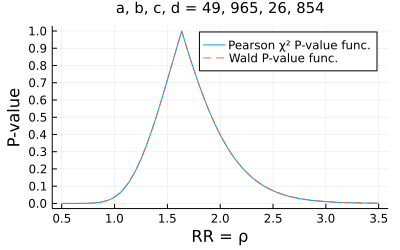

In [39]:
a, b, c, d = 49, 965, 26, 854
plot(ρ -> pvalue_rr_pearson(a,b,c,d; ρ), 0.5, 3.5; label="Pearson χ² P-value func.")
plot!(ρ -> pvalue_rr_wald(a,b,c,d; ρ), 0.5, 3.5; label="Wald P-value func.", ls=:dash)
plot!(; xguide="RR = ρ", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, b, c, d = $a, $b, $c, $d")

この場合には $a,b,c,d$ が十分に大きいので, ほぼぴったり重なっている!

#### Pearsonのχ²検定版のリスク比に関するP値と信頼区間の計算の解答例

* (Pearsonのχ²検定版の仮説「リスク比パラメータは $\RR=1$ である」のP値) ≈ 3.661%
* (Pearsonのχ²検定版のリスク比パラメータ $\RR$ の $95\%$ 信頼区間) ≈ \[1.0305, 2.5998\]

### ニューサンスパラメータの問題に関する注意

我々が想定している統計モデルには $p$ と $q$ という2つのパラメータが含まれている. そこに仮説 $\OR = \omega$ によって制限を課しても, 独立なパラメータの個数は1つしか減らず, たとえば $q$ の側を自由に動けるパラメータとして採用し, 仮説 $\OR=\omega$ によって $p$ の値は $q$ の値から決まると考えることができる. 

だから, P値を定義するために必要な「仮説 $\OR = \omega$ の下での統計モデル内でデータの数値以上に極端な値が生じる確率」は, パラメータ $q$ の値を決めるごとに別々に決まる値になってしまう.  このような状況のとき, $q$ はニューサンスパラメータ(nuisance parameter, 局外パラメータ, 攪乱パラメータ, 迷惑パラメータ)であるという.

しかし, 「データの数値以上に極端な値」の意味を, Wald的な正規分布近似を使ったり, Pearsonのχ²統計量を使ったりして定義すれば, 「仮説 $\OR = \omega$ の下での統計モデル内でデータの数値以上に極端な値が生じる確率」が, $a,b,c,d$ が十分に大きなとき, 近似的にパラメータ $q$ の値によらなくなることを示せる.

以上で紹介したP値の定義にはこのような非常に巧妙な方法が使われている.

ニューサンスパラメータの問題への対処の仕方にはそれら以外にも, 以下の節で説明する条件付き確率分布を利用する方法がある. その方法による検定は __Fisher検定__ と呼ばれている.

## Fisher検定版のオッズ比に関するP値と信頼区間

### 条件付き確率分布を利用するアイデア

2つの二項分布モデルの確率質量函数は

$$
\begin{aligned}
&
P(a,b,c,d|m,n,p,q) =
\binom{m}{a}p^a(1-p)^b \binom{n}{c}q^c(1-q)^d
\\ &
\qquad\qquad
(a,b,c,d\in\Z_{\ge 0},\; a+b=m,\; c+d=n).
\end{aligned}
$$

と書けるのであった.  この分布を条件 $a+c=r$ (そのとき $b+d=m+n-r$)という条件で制限して得られる条件付き確率分布を求めてみよう. パラメータのオッズ比 $\OR$ を

$$
\OR = \frac{p(1-q)}{(1-p)q}
$$

と定めると, 条件 $a+b=m$, $c+d=n$, $a+c=r$ の下で,

$$
\begin{alignedat}{4}
\\ & a = a, \quad
& &  b = m - a, \quad
& &  c = r - a, \quad
& &  d = n-r+a,
\\ & a \ge 0, \quad
& &  a \le m, \quad
& &  a \le r, \quad
& &  a \ge r-n
\end{alignedat}
$$

が成立しているので, 上の確率質量函数は

$$
P(a,b,c,d|m,n,p,q) =
\binom{m}{a}\binom{n}{r-a} (1-p)^m q^r (1-q)^{n-r} (\OR)^a
\propto \binom{m}{a}\binom{n}{r-a} (\OR)^a
$$

ゆえに

$$
Z(m,n,r,\OR) = \sum_a \binom{m}{a}\binom{n}{r-a} (\OR)^a
$$

とおいて, 確率質量函数 $P(a|m,n,r,\OR)$ を

$$
P(a|m,n,r,\OR) = \frac{1}{Z(m,n,r,\OR)} \binom{m}{a}\binom{n}{r-a} (\OR)^a
\quad (\max(0,r-n)\le a \le \min(m,r))
$$

と定義すると, この確率質量函数で定義される確率分布が条件 $a+c=r$ で2つの二項分布モデルを制限して得られる条件付き確率分布になる. この確率分布を __Fisherの非心超幾何分布__ (Fisher's noncentral hypergeometric distribution)と呼び,

$$
\FisherNoncentralHypergeometric(m, n, r, \OR)
$$

と表すことにする.

このように, 条件 $a+c=r$ によって条件付き確率分布に移れば, モデルのパラメータはオッズ比パラメータ $\OR$ だけになる.  ニューサンスパラメータ(nuisance parameter, 局外パラメータ, 攪乱パラメータ, 迷惑パラメータ)がなくなるのである!

だから, 2×2の分割表のデータの数値 $a,b,c,d$ が得られたたときに, $a+b=m$, $c+d=n$, $a+c=r$, $b+d=m+n-r$ という縦と横方向のすべての合計(すべてのマージン)の値を固定することによって得られる条件付き確率分布(Fisherの非心超幾何分布)に移って, 「データの数値以上に極端な値が生じる確率」を正確に求めることによってP値が定義できることがわかる.  P値の定義の方法は二項分布モデルの場合にならえばよい.

この方法には利点と欠点がある.

* __利点:__　Wald版やPearsonのχ²検定版と違って, 確率の計算を近似計算にする必要がなくなる.  それによって, 第一種の過誤が起こる確率を確実に有意水準以下にできる.

* __欠点:__　有限離散分布では分布によって生じる値の個数が減ると, 確率を正確に計算する方法で定義されたP値について, 第一種の過誤の確率が有意水準よりも真に小さくなってしまうことが普通になる.  しかもそれを条件付き確率分布に移ることによて行うと, 第一種の過誤の確率が有意水準よりも大幅に小さくなってしまう場合が出て来る.

第一種の過誤の確率を確実に有意水準以下にしたい場合にはFisher検定は優れた方法になるが, 検出力はその分だけ下がってしまうという欠点がある.  利点と欠点を理解して, 自分の目的に合わせて適切な道具を使えばよいだろう.

__注意:__ Fisherの非心超幾何分布を $\OR=1$ に特殊化すると, 超幾何分布が得られる:

$$
P(a|m,n,r,1) = \binom{m+n}{r}^{-1} \binom{m}{a}\binom{n}{r-a}
\quad (\max(0,r-n)\le a \le \min(m,r)).
$$

この確率は, 赤い玉が $m$ 個, 白い玉が $n$ 個入っている壺から, $r$ 個の玉を無作為に取り出すときに(非復元抽出, $r$ 個をまとめて一度に取り出す様子を想像すればよい), 取り出した $r$ 個の玉の中に含まれる赤い玉の個数が $a$ 個になる確率だと解釈される.

### Sterne型のFisher検定のP値とそれに付随する信頼区間の定義

前節の記号の下で, データの数値 $a,b,c,d$ に対して, $m=a+b$, $n=c+d$, $r=a+c$ とおき, 仮説「オッズ比パラメータは $\OR=\omega$ である」のSterne型のP値を次のように定める:

$$
\pvalue_{\Sterne}(a,b,c,d|\OR=\omega) =
\sum_{P(i|m,n,r,\omega)\le P(a|m,n,r,\omega)} P(i|m,n,r,\omega).
$$

これに対応する信頼度 $1-\alpha$ の信頼区間を

$$
\confint^{\OR}_{\Sterne}(a,b,c,d|\alpha) =
\{\, \omega > 0 \mid \pvalue_{\Sterne}(a,b,c,d|\OR=\omega)\ge\alpha\,\}
$$

によって定める.  もしくは, 実用的には, これの上限と下限に挟まれた区間として, $\confint_{\Sterne}(a,b,c,d|\OR=\omega)$ を定義し直したものを使用する. (このノートでの実装ではそうなっている.)

### Clopper-Pearson型のFisher検定のP値とそれに付随する信頼区間

さらに続けて, Clopper-Pearson型のP値を次のように定める:

$$
\pvalue_{\CP}(a,b,c,d|\OR=\omega) =
\min\begin{pmatrix}
1 \\
2\cdf(\FisherNoncentralHypergeometric(a+b, c+d, a+c, \omega), a) \\
2(1 - \cdf(\FisherNoncentralHypergeometric(a+b, c+d, a+c, \omega), a-1)) \\
\end{pmatrix}
$$

これに対応する信頼度 $1-\alpha$ の信頼区間を

$$
\confint^{\OR}_{\CP}(a,b,c,d|\alpha) =
\{\, \omega > 0 \mid \pvalue_{\CP}(a,b,c,d|\OR=\omega)\ge\alpha\,\}
$$

によって定める.

### 問題: Fisher検定版のオッズ比に関するP値と信頼区間の計算例

以下のデータについて, Sterne型およびClopper-Pearsonの型の2種類のFisher検定のP値とそれに付随する信頼区間を計算せよ:

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

ただし, 検定する仮説は「オッズ比パラメータ $\OR=1$ である」であるとし(独立性に関するFisher検定の場合), 求める信頼区間は信頼度 $95\%$ のオッズ比パラメータの信頼区間であるとする. 

#### Julia言語によるFisher検定版のオッズ比に関するP値と信頼区間の計算例

In [40]:
a, b, c, d = 49, 965, 26, 854
@show oddsratiohat(a, b, c, d)
@show pvalue_or_wald(a, b, c, d)
@show pvalue_or_pearson(a, b, c, d)
@show pvalue_or_sterne(a, b, c, d)
@show pvalue_or_clopper_pearson(a, b, c, d)
@show confint_or_wald(a, b, c, d)
@show confint_or_pearson(a, b, c, d)
@show confint_or_sterne(a, b, c, d)
@show confint_or_clopper_pearson(a, b, c, d);

oddsratiohat(a, b, c, d) = 1.6678357911518533
pvalue_or_wald(a, b, c, d) = 0.03847043006362489
pvalue_or_pearson(a, b, c, d) = 0.03661487827607113
pvalue_or_sterne(a, b, c, d) = 0.044079014645063516
pvalue_or_clopper_pearson(a, b, c, d) = 0.047080761570760604
confint_or_wald(a, b, c, d) = [1.0275181208761617, 2.7071797272783877]
confint_or_pearson(a, b, c, d) = [1.031778110800563, 2.6957054358850328]
confint_or_sterne(a, b, c, d) = [1.0202716568785046, 2.7656505208089848]
confint_or_clopper_pearson(a, b, c, d) = [1.0061031380773773, 2.8212565352058787]


#### Julia言語によるFisher²検定のオッズ比に関するP値函数の視覚化

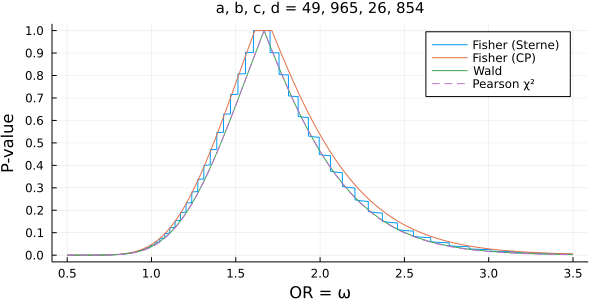

In [41]:
a, b, c, d = 49, 965, 26, 854
plot(ω -> pvalue_or_sterne(a,b,c,d; ω), 0.5, 3.5; label="Fisher (Sterne)")
plot!(ω -> pvalue_or_clopper_pearson(a,b,c,d; ω), 0.5, 3.5; label="Fisher (CP)")
plot!(ω -> pvalue_or_wald(a,b,c,d; ω), 0.5, 3.5; label="Wald")
plot!(ω -> pvalue_or_pearson(a,b,c,d; ω), 0.5, 3.5; label="Pearson χ²", ls=:dash)
plot!(; xguide="OR = ω", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, b, c, d = $a, $b, $c, $d")
plot!(size=(600, 300))

Wald型とPearson型のP値函数はほぼぴったり一致している.

2種のFisher検定にP値函数はそれらと一致していないが, 互いに相手を近似しあう関係になっている.

#### R言語によるFisher検定版のP値と信頼区間の計算の仕方

Sterne型の独立性検定の場合のP値とClopper-Pearson型のオッズ比の信頼区間をR言語の `fisher.test` 函数で求めることができる.

```R
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = fisher.test(A)
```

In [42]:
R"""
A = matrix(c(49, 965, 26, 854), 2, 2, byrow=T)
result = fisher.test(A)
"""

RObject{VecSxp}

	Fisher's Exact Test for Count Data

data:  A
p-value = 0.04408
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.006104 2.821251
sample estimates:
odds ratio 
  1.667393 



R言語の `fisher.test` では表示されるP値と信頼区間のあいだに整合性が無くなる場合が出て来てしまう.

In [43]:
R"""
result = fisher.test(matrix(c(16, 4, 4, 6), 2, 2, byrow=T))
"""

RObject{VecSxp}

	Fisher's Exact Test for Count Data

data:  matrix(c(16, 4, 4, 6), 2, 2, byrow = T)
p-value = 0.04486
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.8602909 44.0017191
sample estimates:
odds ratio 
  5.585888 



仮説「オッズ比パラメータは $1$ である」のP値が $5\%$ を切っているのに, $95\%$ 信頼区間に $1$ が含まれてしまっている.

この問題は exact2x2 パッケージを利用すれば解決する.

```R
exact2x2::exact2x2(matrix(c(16, 4, 4, 6), 2, 2, byrow=T), plot=T)
```

```R
exact2x2::exact2x2(matrix(c(16, 4, 4, 6), 2, 2, byrow=T), tsmethod="central", plot=T)
```

`exact2x2` 函数では `tsmethod="minlik"` がSterne型を意味し, `tsmethod="central"` がClopper-Pearson型を意味している.

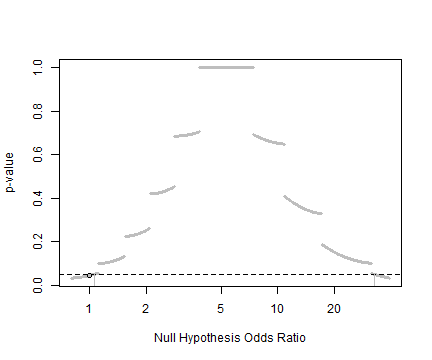

RObject{VecSxp}

	Two-sided Fisher's Exact Test (usual method using minimum likelihood)

data:  matrix(c(16, 4, 4, 6), 2, 2, byrow = T)
p-value = 0.04486
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.0549 32.6994
sample estimates:
odds ratio 
  5.585888 



In [44]:
R"""
exact2x2::exact2x2(matrix(c(16, 4, 4, 6), 2, 2, byrow=T), plot=T)
"""

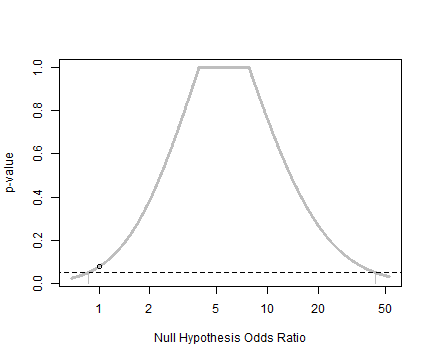

RObject{VecSxp}

	Central Fisher's Exact Test

data:  matrix(c(16, 4, 4, 6), 2, 2, byrow = T)
p-value = 0.07742
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.8602909 44.0017191
sample estimates:
odds ratio 
  5.585888 



In [45]:
R"""
exact2x2::exact2x2(matrix(c(16, 4, 4, 6), 2, 2, byrow=T), tsmethod="central", plot=T)
"""

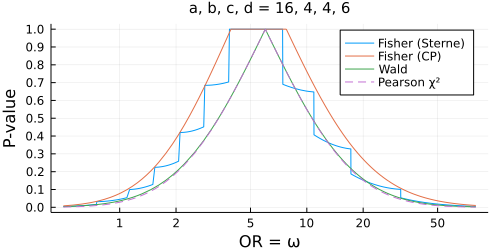

In [46]:
a, b, c, d = 16, 4, 4, 6
plot(ω -> pvalue_or_sterne(a,b,c,d; ω), 0.5, 80; label="Fisher (Sterne)")
plot!(ω -> pvalue_or_clopper_pearson(a,b,c,d; ω), 0.5, 80; label="Fisher (CP)")
plot!(ω -> pvalue_or_wald(a,b,c,d; ω), 0.5, 80; label="Wald")
plot!(ω -> pvalue_or_pearson(a,b,c,d; ω), 0.5, 80; label="Pearson χ²", ls=:dash)
plot!(; xguide="OR = ω", yguide="P-value")
plot!(; ytick=0:0.1:1)
title!("a, b, c, d = $a, $b, $c, $d")
plot!(; size=(500, 250))
plot!(; xscale=:log, xtick=([1,2,5,10,20,50], string.([1,2,5,10,20,50])))

#### Fisher検定版のオッズ比に関するP値と信頼区間の計算の解答例

P値

* (Sterne型のFisher検定版の仮説「オッズ比パラメータは $\OR=1$ である」のP値) ≈ 4.408%
* (Clopper-Pearson型のFisher検定版の仮説「オッズ比パラメータは $\OR=1$ である」のP値) ≈ 4.708%

95%信頼区間

* (Sterne型のFisher検定版のオッズ比パラメータ $\OR$ の $95\%$ 信頼区間) ≈ \[1.0202, 2.7657\]
* (Clopper-Pearson型のFisher検定版のオッズ比パラメータ $\OR$ の $95\%$ 信頼区間) ≈ \[1.006, 2.8213\]

### Fisher検定における第一種の過誤の確率

「オッズ比パラメータは $\OR=1$ である」という仮説のP値を条件付き確率を正確に計算することによって計算することによって行われる検定を __Fisher検定__ (Fisherの正確検定, Fisher's exact test) と呼ぶ.

上で説明したように, Fisher検定には少なくともSterne版とClopper-Pearson版の2種類があるが(実はさらに別の変種も考えることができるが), どれを使っても, 第一種の過誤の確率を有意水準 $\alpha$ 以下に抑えることができるという利点を持っている.

しかし, その利点は欠点の裏返しでもあり, Fisher検定での第一種の過誤の確率を有意水準 $\alpha$ よりかなり小さくなってしまいがちである.  第一種の過誤の確率は確率を有意水準 $\alpha$ に近い方がよい.

以下ではFisher検定における第一種の過誤の確率のグラフを描いてみよう.

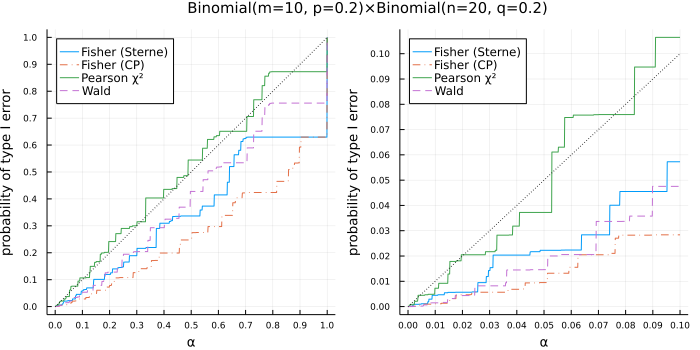

In [47]:
plot_probabilities_of_type_I_error(10, 20, 0.2)

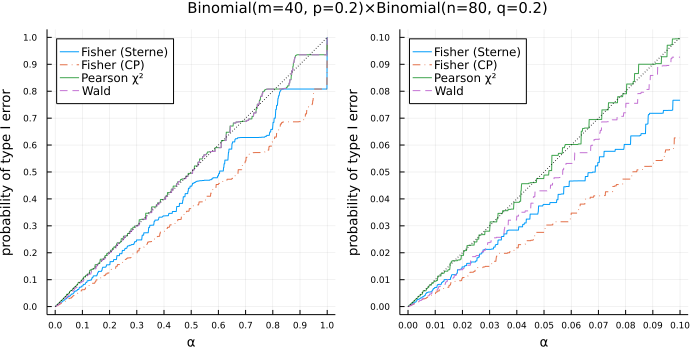

In [48]:
plot_probabilities_of_type_I_error(40, 80, 0.2)

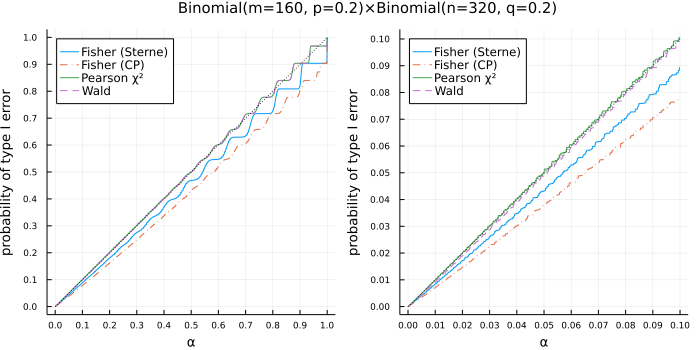

In [49]:
plot_probabilities_of_type_I_error(160, 320, 0.2)

このように, Fisher検定はデータサイズを大きくしても, 第一種の過誤の確率が有意水準 $\alpha$ になかなか近付かない.

__注意:__ これと同じことをR言語で行う場合には以下のことに注意する必要がある:

* R言語の `chisq.test` はデフォルトではYatesの連続性補正を行うので, `correct=F` として補正を無効にする必要がある.
* R言語の `fisher.test` が表示するP値はSterne版(もしくは "minlik" 版)である.
* Clopper-Pearson型のP値が必要ならば `exact2x2::exact2x2` を `tsmthod="central"` で使用すること.

## おまけ: Bayes信用区間

### オッズ比パラメータとリスク比パラメータのBayes信用区間

以下の手続きでオッズ比パラメータ $\OR$ やリスク比パラメータ $\RR$ の区間推定を行うことができる.

(1) パラメータ $(p,q)$ の事前分布 $\Beta(1,1)\times \Beta(1,1)$ を用意する.

(2) データの数値 $a,b,c,d$ から事後分布 $\Beta(a+1,b+1)\times\Beta(c+1,d+1)$ を作る.

(3) 事後分布の従う乱数を $M=10^6$ 個生成する. その結果を $(p_i,q_i)$ ($i=1,2,\ldots,M$) と表す.

(4) $i=1,2,\ldots,M$ についてその乱数のオッズ比 $\omega_i = (p_i/(1-p_i))/(q_i(1-q_i))$ とリスク比 $\rho_i = p_i/q_i$ を計算する.

(5) $\omega_1,\omega_2,\ldots,\omega_M$ の $\alpha/2$ 分位点 $\OR_L$ と $1-\alpha/2$ 分位点 $\OR_U$ を計算する:

$$
\OR_L = \quantile([\omega_1,\omega_2,\ldots,\omega_M], \alpha/2), \quad
\OR_U = \quantile([\omega_1,\omega_2,\ldots,\omega_M], 1-\alpha/2).
$$

$\rho_1,\rho_2,\ldots,\rho_M$ の $\alpha/2$ 分位点 $\RR_L$ と $1-\alpha/2$ 分位点 $\RR_U$ を計算する:

$$
\RR_L = \quantile([\rho_1,\rho_2,\ldots,\rho_M], \alpha/2), \quad
\RR_U = \quantile([\rho_1,\rho_2,\ldots,\rho_M], 1-\alpha/2).
$$

(6) 区間 $[\OR_L, \OR_U]$ をオッズ比パラメータ $\OR$ の信用度 $1-\alpha$ の __信用区間__ (確信区間, credible interval)と呼び, 区間 $[\RR_L, \RR_U]$ をリスク比パラメータ $\RR$ の信用度 $1-\alpha$ の信用区間と呼ぶ:

$$
\begin{aligned}
&
\credint^{\OR}_{\Bayes}(a,b,c,d|\alpha) = [\OR_L, \OR_U],
\\ &
\credint^{\RR}_{\Bayes}(a,b,c,d|\alpha) = [\RR_L, \RR_U].
\end{aligned}
$$

これらの区間は乱数の出目によって確率的に少し揺らぐが $M=10^6$ が大きなおかげで微小にしか揺らがない.

In [50]:
function credint_or_bayes(a, b, c, d; α=0.05, M=10^6)
    p = rand(Beta(a+1, b+2), M)
    q = rand(Beta(c+1, d+2), M)
    ω = @. (p*(1-q))/((1-p)*q)
    [quantile(ω, α/2), quantile(ω, 1-α)]
end

function credint_rr_bayes(a, b, c, d; α=0.05, M=10^6)
    p = rand(Beta(a+1, b+2), M)
    q = rand(Beta(c+1, d+2), M)
    ρ = @. p/q
    [quantile(ρ, α/2), quantile(ρ, 1-α)]
end

credint_rr_bayes (generic function with 1 method)

### Bayes信用区間の計算例

以下のデータについて今まで定義した信頼区間と信用区間を計算してみよう(信頼度は $95\%$ とする).

$$
\begin{array}{c|c|c|c}
& \text{商品を購入した} & \text{購入しなかった} & \text{合計} \\
\hline
\text{デザインA} & 49   &  965 & 1014 \\
\hline
\text{デザインB} & 26   &  854 &  880 \\
\hline
\text{合計}      & 75   & 1819 & 1894 \\ 
\end{array}
$$

In [51]:
a, b, c, d = 49, 965, 26, 854
@show a, b, c, d
println()
@show confint_or_wald(a, b, c, d)
@show confint_or_pearson(a, b, c, d)
@show confint_or_sterne(a, b, c, d)
@show confint_or_clopper_pearson(a, b, c, d)
@show credint_or_bayes(a, b, c, d)
println()
@show confint_rr_wald(a, b, c, d)
@show confint_rr_pearson(a, b, c, d)
@show credint_rr_bayes(a, b, c, d);

(a, b, c, d) = (49, 965, 26, 854)

confint_or_wald(a, b, c, d) = [1.0275181208761617, 2.7071797272783877]
confint_or_pearson(a, b, c, d) = [1.031778110800563, 2.6957054358850328]
confint_or_sterne(a, b, c, d) = [1.0202716568785046, 2.7656505208089848]
confint_or_clopper_pearson(a, b, c, d) = [1.0061031380773773, 2.8212565352058787]
credint_or_bayes(a, b, c, d) = [1.0305854335887983, 2.4860437507476942]

confint_rr_wald(a, b, c, d) = [1.025408984412048, 2.6087819449169145]
confint_rr_pearson(a, b, c, d) = [1.03047149323473, 2.5998459013273476]
credint_rr_bayes(a, b, c, d) = [1.0290193410622588, 2.4014826778693807]


このようにどれも同じような区間になる.

### Bayes信用区間に付随するP値函数

任意の区間推定から逆にP値函数を作れるのであった.

$\omega_1,\omega_2,\ldots,\omega_M$ の中の $\omega$ 以下の値の割合を $\ecdf([\omega_1,\omega_2,\ldots,\omega_M], \omega)$ と書く:

$$
\ecdf([\omega_1,\omega_2,\ldots,\omega_M], \omega) =
(\text{$\omega_i\le\omega$ となる $i$ の個数})/M
$$

これを $\omega_1,\omega_2,\ldots,\omega_M$ の __経験累積分布函数__ (empirical cumulative distribution function)と呼ぶ.

(7) 仮説「オッズ比パラメータは $\OR=\omega$ である」の __Bayes版P値__ (Bayesian P-value)を

$$
\pvalue_{\Bayes}(a,b,c,d|\OR=\omega) =
\min\begin{pmatrix}
1 \\
2\ecdf([\omega_1,\omega_2,\ldots,\omega_M], \omega) \\
2(1 - \ecdf([\omega_1,\omega_2,\ldots,\omega_M], \omega) \\
\end{pmatrix}
$$

と定める.  同様に, 仮説「リスク比パラメータは $\RR=\rho$ である」のBayes版P値を

$$
\pvalue_{\Bayes}(a,b,c,d|\RR=\rho) =
\min\begin{pmatrix}
1 \\
2\ecdf([\rho_1,\rho_2,\ldots,\rho_M], \rho) \\
2(1 - \ecdf([\rho_1,\rho_2,\ldots,\rho_M], \rho) \\
\end{pmatrix}
$$

と定める.  これらのP値達は乱数の出目によって確率的に少し揺らぐが $M=10^6$ が大きなおかげで微小にしか揺らがない.

__注意:__ これは乱数生成による Monte Carlo 法によるP値の計算法である. 数値積分でP値を計算するようにもできる.  以下のノートではリスク比のP値の場合に実際にそれを行っている:

* [イベルメクチン論文の図の再現](https://github.com/genkuroki/public/blob/main/0029/Supplementary%20Appendix%20Figure%20S6.ipynb)

In [52]:
"""Bayes版P値函数達を作る函数"""
function make_pvalue_or_rr_bayes(a, b, c, d; M=10^6)
    p = rand(Beta(a+1, b+2), M)
    q = rand(Beta(c+1, d+2), M)
    ω = @. (p*(1-q))/((1-p)*q)
    ρ = @. p/q
    ecdf_OR = ecdf(ω)
    ecdf_RR = ecdf(ρ)
    pvalue_or_bayes(ω) = min(1, 2ecdf_OR(ω), 2(1-ecdf_OR(ω)))
    pvalue_rr_bayes(ρ) = min(1, 2ecdf_RR(ρ), 2(1-ecdf_RR(ρ)))
    pvalue_or_bayes, pvalue_rr_bayes
end

function plot_pvalue_functions(a, b, c, d;
        xlim=Tuple(confint_or_pearson(a, b, c, d; α=1e-3)), kwargs...)
    pvalue_or_bayes, pvalue_rr_bayes = make_pvalue_or_rr_bayes(a, b, c, d)

    P = plot()
    plot!(ω -> pvalue_or_bayes(ω), xlim...; label="Bayes")
    plot!(ω -> pvalue_or_wald(a,b,c,d; ω), xlim...; label="Wald", ls=:dashdot)
    plot!(ω -> pvalue_or_pearson(a,b,c,d; ω), xlim...; label="Pearson χ²", ls=:dash)
    #plot!(ω -> pvalue_or_sterne(a,b,c,d; ω), xlim...; label="Fisher (Sterne)")
    #plot!(ω -> pvalue_or_clopper_pearson(a,b,c,d; ω), xlim...; label="Fisher (CP)")
    plot!(; xguide="OR = ω", yguide="P-value")
    plot!(; ytick=0:0.1:1)
    title!("a, b, c, d = $a, $b, $c, $d")

    Q = plot()
    plot!(ρ -> pvalue_rr_bayes(ρ), xlim...; label="Bayes")
    plot!(ρ -> pvalue_rr_wald(a,b,c,d; ρ), xlim...; label="Wald", ls=:dashdot)
    plot!(ρ -> pvalue_rr_pearson(a,b,c,d; ρ), xlim...; label="Pearson χ²", ls=:dash)
    plot!(; xguide="RR = ρ", yguide="P-value")
    plot!(; ytick=0:0.1:1)
    title!("a, b, c, d = $a, $b, $c, $d")

    plot(P, Q; size=(800, 250),
        leftmargin=4Plots.mm, bottommargin=4Plots.mm)
    plot!(; kwargs...)
end

plot_pvalue_functions (generic function with 1 method)

### Bayes版P値函数の視覚化

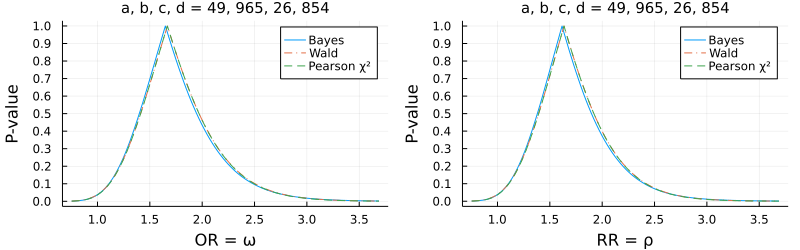

In [53]:
a, b, c, d = 49, 965, 26, 854
plot_pvalue_functions(a, b, c, d)

このように, Bayes版P値函数は通常のWald版およびPearsonのχ²検定版のP値函数によく一致している.

### Bayes版P値函数の視覚化の別の例

$$
\begin{array}{c|c|c|c}
& \text{症状悪化} & \text{悪化せず} & \text{合計} \\
\hline
\text{薬Iを処方} & 100 &  579 &  679 \\
\hline
\text{プラセボ}  & 111 &  568 &  679 \\
\hline
\text{合計}      & 211 & 1147 & 1358 \\ 
\end{array}
$$

この表は次の論文

* Gilmar Reis, M.D., Ph.D. et al., Effect of Early Treatment with Ivermectin among Patients with Covid-19, N Engl J Med 2022; 386:1721-1731. \[[link](https://www.nejm.org/doi/full/10.1056/NEJMoa2115869)\]

の Table 2 から [Intention-to-treat population](https://www.google.com/search?q=Intention-to-treat)の部分だけを抜き出したものである.  「症状悪化」の正確な意味などに関する詳しい説明は論文を参照せよ.
(このデータは必修問題において既出である.)

__この論文ではリスク比の区間推定方法としてちょうど上で説明したリスク比のBayes信用区間を採用している.__

上の表のデータについてP値函数のグラフを描いてみよう.

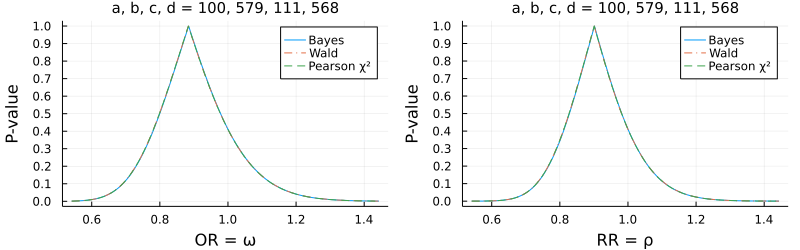

In [54]:
a, b, c, d = 100, 579, 111, 568
plot_pvalue_functions(a, b, c, d)

論文ではBayes統計の方法を使って区間推定しているが, P値函数達に関するこのグラフを見れば分かるように, Bayes統計版ではないWald版やPearsonのχ²検定版の信頼区間を使っても同じ結果が得られる.

この一致は偶然ではない. 十分に $a,b,c,d$ が大きいがゆえに正規分布近似が有効になっているので一致している.

巷に溢れる「ベイズ統計入門」では「通常の統計学とは異なる主義・思想・哲学に基くベイズ統計学というものがある」のような感じの解説が目立つ. そのような解説に騙されないように注意することが必要である.

どんなに主義・思想・哲学が違っていても, 実践的には無意味な小さな違いしかない量(実践的には同じ量とみなされる)を計算しているのであれば, 主義・思想・哲学の違いは実践的には無視できるということを意味している.